# ML Models for Insurance Premium Pred: Regression

## Table of contents
---------------------------------------------
-  Import  Python Libraries 
-  Function Helper
-  Import Dataset & Data Description
-  Data Understanding
-  Select the Features
-  Data Pre-Processing
-  Exploratory Data Analysis
-  Data Transformation
-  Feature Engineering 
-  Feature Selection
-  Statistics Analysis
-  Data Splitting 
-  Machine Learning Models 
-  Machine Learning Optimization
-  Accuracy Score Summary 
-  Predication
-  Save The Machien Learning Models 

# Import Python Libraries 

In [1]:
import pandas as pd
import numpy as np 
np.iinfo(np.uint64).max

#   Visualization Libraries
import matplotlib.pyplot as plt
import plotly.express as px
from termcolor import colored 
import seaborn as sns  
from tabulate import tabulate

##      Importing plotly and cufflinks in offline mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

##      Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

##      Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#   Feature Engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
le_orig = LabelEncoder()
ohe = OneHotEncoder()

#   Data Transformation 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer

#   Feature Selection
import sys
import joblib

sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest # Select features based on the k highest scores.
from sklearn.feature_selection import SelectPercentile # Select features based on percentile of the highest scores.
from sklearn.feature_selection import chi2 # Chi-squared stats of non-negative features for Regression tasks.
from sklearn.feature_selection import mutual_info_classif # Mutual information for a discrete target
from sklearn.feature_selection import f_classif # ANOVA F-value between label/feature for Regression tasks.

#   Data Splitting 
from sklearn.model_selection import train_test_split

#   sklearn Regressor Evaluation libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import accuracy_score # To get the accuracy score 

#   Supervised Machine Learning Models
##      Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

##      Gradient Boosting Regressor 
from sklearn.ensemble import GradientBoostingRegressor

##      Histogram-based Gradient Boosting Regression Tree
from sklearn.ensemble import HistGradientBoostingRegressor

##      AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

##      Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor

##      K-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor

##      Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

##      Linear Regressor with stochastic gradient descent SGD training.
from sklearn.linear_model import SGDRegressor

##      XGBoost Regressor
from xgboost import XGBRegressor

##      Support Vector Machines Regressor
from sklearn.svm import SVR

##      Linear Support Vector Regression
from sklearn.svm import LinearSVR

##      Multilayer Perceptron Regressor
from sklearn.neural_network import MLPRegressor

#   Model Optmization
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Save and Load the Machine Learning Models 
import pickle

# Function Helper

In [2]:
'''
Read Dataset
'''
def CSV_File(path): 

    df_csv = pd.read_csv(path)

    return df_csv
      
'''
Missong Value Information
'''
def missing_values(df_missing_value_per):

    missing_number = df_missing_value_per.isnull().sum().sort_values(ascending=False)
    missing_percent = (df_missing_value_per.isnull().sum()/df_missing_value_per.shape[0]).sort_values(ascending=False) 
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])

    return missing_values[missing_values['Missing_Number']>=0]

def missing_values_info(df_missing_value):

    print(colored(f"Missing Values for Catuogirical Dataset:\n", attrs=['bold']), missing_values(df_missing_value),'\n',  
        colored('-'*79, 'red', attrs=['bold']), sep='')

def SelectRowsHavingMissing_Value(df_Missing_Rows):

    null_data = df_Missing_Rows[df_Missing_Rows.isnull().any(axis=1)]
    
    return null_data

def replace_NA_by_0(df_replace, Col_NA_TO_Zero):

    if Col_NA_TO_Zero !=[]:
        df_replace[Col_NA_TO_Zero] = df_replace[Col_NA_TO_Zero].fillna(0) # if the Varibles is str we use '0', else 0
        
    return df_replace

def replace_0_by_NA(df_replace, col_0_to_NA):

    df_replace[col_0_to_NA] = df_replace[col_0_to_NA].replace('0', np.nan) # if the Varibles is str we use '0', else 0

    return df_replace

'''
Split the Dataset Variables to Obj and Num
'''
def Data_Splitting_Num_Obj(df_split):

    Obj = df_split.select_dtypes(include = ['object'])
    Num = df_split.select_dtypes(include = np.number) 

    return Obj, Num

'''
Exploratory Data Analysis (EDA)
'''
def EDA_target(df_EDA,target):

      if (df_EDA[target].dtype == 'float64' or df_EDA[target].dtype == 'int64'):
            fig = px.histogram(df_EDA, x=target)
            fig.show()
            

def EDA_target2(df_EDA,target):

      if (df_EDA[target].dtype == 'float64' or df_EDA[target].dtype == 'int64'):

            df_EDA.boxplot(column=target, figsize=(30, 20))
            plt.show()

def obj_EDA(df_EDA, cols):

    for col in cols:
        table = pd.DataFrame(df_EDA[col].value_counts())
        print(tabulate(table, headers = 'keys', tablefmt = 'psql'))
        plt.figure(figsize = (40, 20))
        df_EDA[col].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
        plt.title(col)
        plt.show()

def EDA_obj(df_EDA, cols, Target):

    for col in cols:
        print('Variable Name: ', df_EDA[col].name)
        pd.crosstab(df_EDA[col], df_EDA[Target]).iplot(kind="bar")

def EDA_num(df_EDA, cols):

    for col in cols: 
        fig, ax = plt.subplots(figsize=(30, 20))
        df_EDA.hist(column=[col], ax=ax )

def EDA_num_2(df_EDA, cols):

    for col in cols: 
        df_EDA.boxplot(column=col, figsize=(30, 20))
        plt.show()
    
def EDA_num_with_DV(df_eda, NUMcols_eda, target): 

    for col in NUMcols_eda:
        sns.set_style('whitegrid')
        plt.figure(figsize=(20,10))
        sns.set_context('paper', font_scale=1.5)

        sns.histplot(x=col, data = df_eda, bins = 30, hue = target,palette="Blues", kde = True).set_title(col,fontsize=20)
        plt.legend(['not satisfaction','satisfaction'],shadow = True, loc = 0);

'''
Data Transformation
'''
def NumStandardScaler(dataframe_series):

    for col in list(dataframe_series.columns):
        if (dataframe_series[col].dtype == 'float64' or dataframe_series[col].dtype == 'int64'): 
                print ('\nStandardization Applied On:', col)
                dataframe_series[col] = StandardScaler().fit_transform(dataframe_series[col].values.reshape(-1,1))

    return dataframe_series

'''
Feature Engineering 
'''
def AllObjLabelEncoder(dataframe_series):

    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    le_orig = preprocessing.LabelEncoder()

    df_old = dataframe_series.copy(deep = False)

    if dataframe_series.dtype=='object':
        col = dataframe_series.name

        dataframe_series = le.fit_transform(dataframe_series)
        print('\nLable Encoding Applied On:', col)

        le.fit(dataframe_series)
        print('New Value for',col,' Variable:', le.classes_)

        le_orig.fit(df_old)
        print('Old Value for',col,'Variable:', le_orig.classes_)

    return dataframe_series

'''
Feature Selection
'''
def Feature_selection_forward(df_forward, target):

    # Split the df into Obj and Num
    obj, num = Data_Splitting_Num_Obj(df_forward)

    list_df_num = list(num.columns)
    if target not in list_df_num: 
        list_df_num.append(target)
    print('All the Num Variables:',list_df_num)

    list_df_Obj = list(obj.columns)
    print('\nAll the obj Variables:',list_df_Obj)

    # Create New DataFrame Hvae only the Num Variables
    df_num = df_forward[list_df_num]

    # define dataset
    X = df_num.drop(target, axis=1)
    y = df_num[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    forward_FS = SequentialFeatureSelector(RandomForestRegressor(n_jobs= -1, ), # How many course you want to use. '-1 mwans all the course'
                                                                k_features= (1, X.shape[1]),
                                                                forward=True,
                                                                floating=False,
                                                                scoring = 'neg_mean_squared_error', # mean_squared_error, neg_mean_squared_error
                                                                verbose=2,
                                                                cv= 5
                ).fit(X_train, y_train)

    new_list_num = list(forward_FS.k_feature_names_)

    print ('\nMost Variables Can Effect The Target Variables: ',new_list_num)
    print ('\nWith Highest Score: ',forward_FS.k_score_)

    
    if target not in new_list_num: 
        new_list_num.append(target)
    print('\nAll the Variables Selected: ',new_list_num)

    new_df_list = new_list_num + list_df_Obj
    df_forward = df_forward[new_df_list]

    forward_FS = pd.DataFrame(forward_FS.get_metric_dict()).T

    return df_forward, forward_FS

def Save_ML(ML_Name, _ml):

    i = 0 

    for ML in ML_Name:

        with open(ML, "wb") as file:
            
            print(f'Create file name {ML}')

            pickle.dump(_ml[i], file)
            print('Model:', _ml[i], 'Saved\n')

        i += 1  

# Import Dataset & Data Description

## Import Dataset

In [3]:
Path = '/content/Health_insurance.csv'
file_type = 'C'

if file_type == 'C':
    df = CSV_File(Path)

In [4]:
pd.DataFrame(df.head(10))

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855
5,31,female,25.740,0,no,southeast,3756.622
6,46,female,33.440,1,no,southeast,8240.590
7,37,female,27.740,3,no,northwest,7281.506
8,37,male,29.830,2,no,northeast,6406.411
9,60,female,25.840,0,no,northwest,28923.137


## Data Description

# Data Understanding

In [5]:
print(df.info(), '\n', 
            colored('-'*79, 'red', attrs=['bold']), sep='')
missing_values_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
-------------------------------------------------------------------------------
Missing Values for Catuogirical Dataset:
          Missing_Number  Missing_Percent
age                    0            0.000
sex                    0            0.000
bmi                    0            0.000
children               0            0.000
smoker                 0            0.000
region                 0            0.000
charges                0            0.000
------------------

In [6]:
NUMcols = df.select_dtypes(np.number).columns
Objcols = df.select_dtypes(include = ['object']).columns

In [7]:
if len(NUMcols) != 0 :
    su_stat = pd.DataFrame(df.describe().T)
    print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+----------+---------+-------------+-------------+---------+-----------+---------+------------+----------+
|          |   count |        mean |         std |     min |       25% |     50% |        75% |      max |
|----------+---------+-------------+-------------+---------+-----------+---------+------------+----------|
| age      |    1338 |    39.207   |    14.05    |   18    |   27      |   39    |    51      |    64    |
| bmi      |    1338 |    30.6634  |     6.09819 |   15.96 |   26.2963 |   30.4  |    34.6938 |    53.13 |
| children |    1338 |     1.09492 |     1.20549 |    0    |    0      |    1    |     2      |     5    |
| charges  |    1338 | 13270.4     | 12110       | 1121.87 | 4740.29   | 9382.03 | 16639.9    | 63770.4  |
+----------+---------+-------------+-------------+---------+-----------+---------+------------+----------+


In [8]:
if len(Objcols) != 0 :
    su_stat = pd.DataFrame(df.describe(include=object).T)
    print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+--------+---------+----------+-----------+--------+
|        |   count |   unique | top       |   freq |
|--------+---------+----------+-----------+--------|
| sex    |    1338 |        2 | male      |    676 |
| smoker |    1338 |        2 | no        |   1064 |
| region |    1338 |        4 | southeast |    364 |
+--------+---------+----------+-----------+--------+


In [9]:
pd.DataFrame(df.var())

,0
age,197.401
bmi,37.188
children,1.453
charges,146652372.153


# Select the Features

In [10]:
'''
                1)        Target Varibale
'''
target = 'charges'


'''
                3)        Convert Data Type 
'''
# to convert variable type to str
convert_to_str = 'Enable' 
col_convert_str = [  
                    
                    'children'
                ]

'''
                7)        Data Transformation
'''
DT = 'StandardScaler' # 'StandardScaler' , or 'Disable'


'''
                8)        Featuers Selection And Featuers Engineering
'''
# Featuers
FE = 'LableEncodeing' # 'LableEncodeing' , or 'Disable'
FS = 'Forward' # 'Forward'  or 'Disable'

'''
                10)        Data Splitting
'''
# Randomly
Random = 'Enable'
Split_size = 0.15 # Testing Size
Randon_state_size = 42
'''
                11)        Machine Learning Models 
'''
ML_ST = 'Enable'

'''  
                12)        Machine Learning Optimization 
'''
ML_OP = 'Enable'

# Data Pre-Processing

## Split the Dataset

In [11]:
NUMcols = df.select_dtypes(np.number).columns
Objcols = df.select_dtypes(include = ['object']).columns

# Exploratory Data Analysis (EDA)

In [12]:
NUMcols = df.select_dtypes(np.number).columns
NUMcols = NUMcols.drop(target)

Objcols = df.select_dtypes(include = ['object']).columns

## Dependent Variables

In [13]:
EDA_target(df, target)

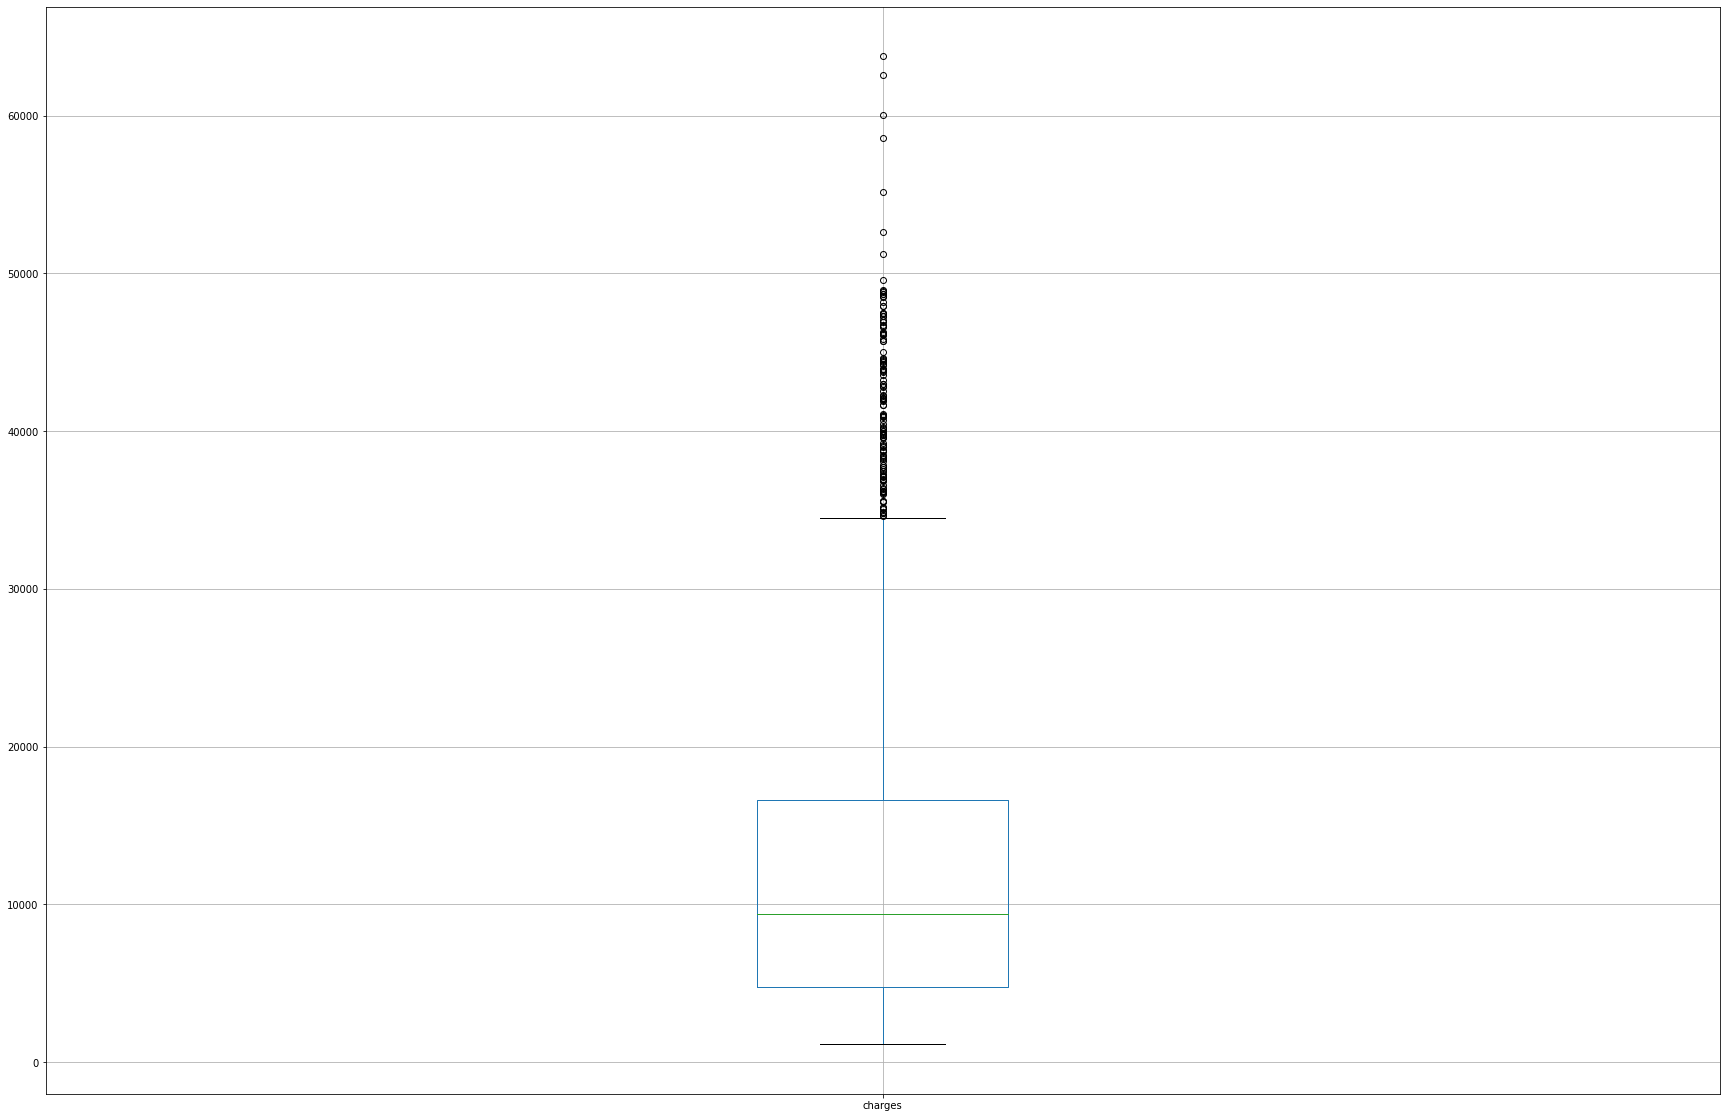

In [14]:
EDA_target2(df, target)

## Independent Dependent Variables

### Independent Dependent Variables (Object Variables) 

+--------+-------+
|        |   sex |
|--------+-------|
| male   |   676 |
| female |   662 |
+--------+-------+


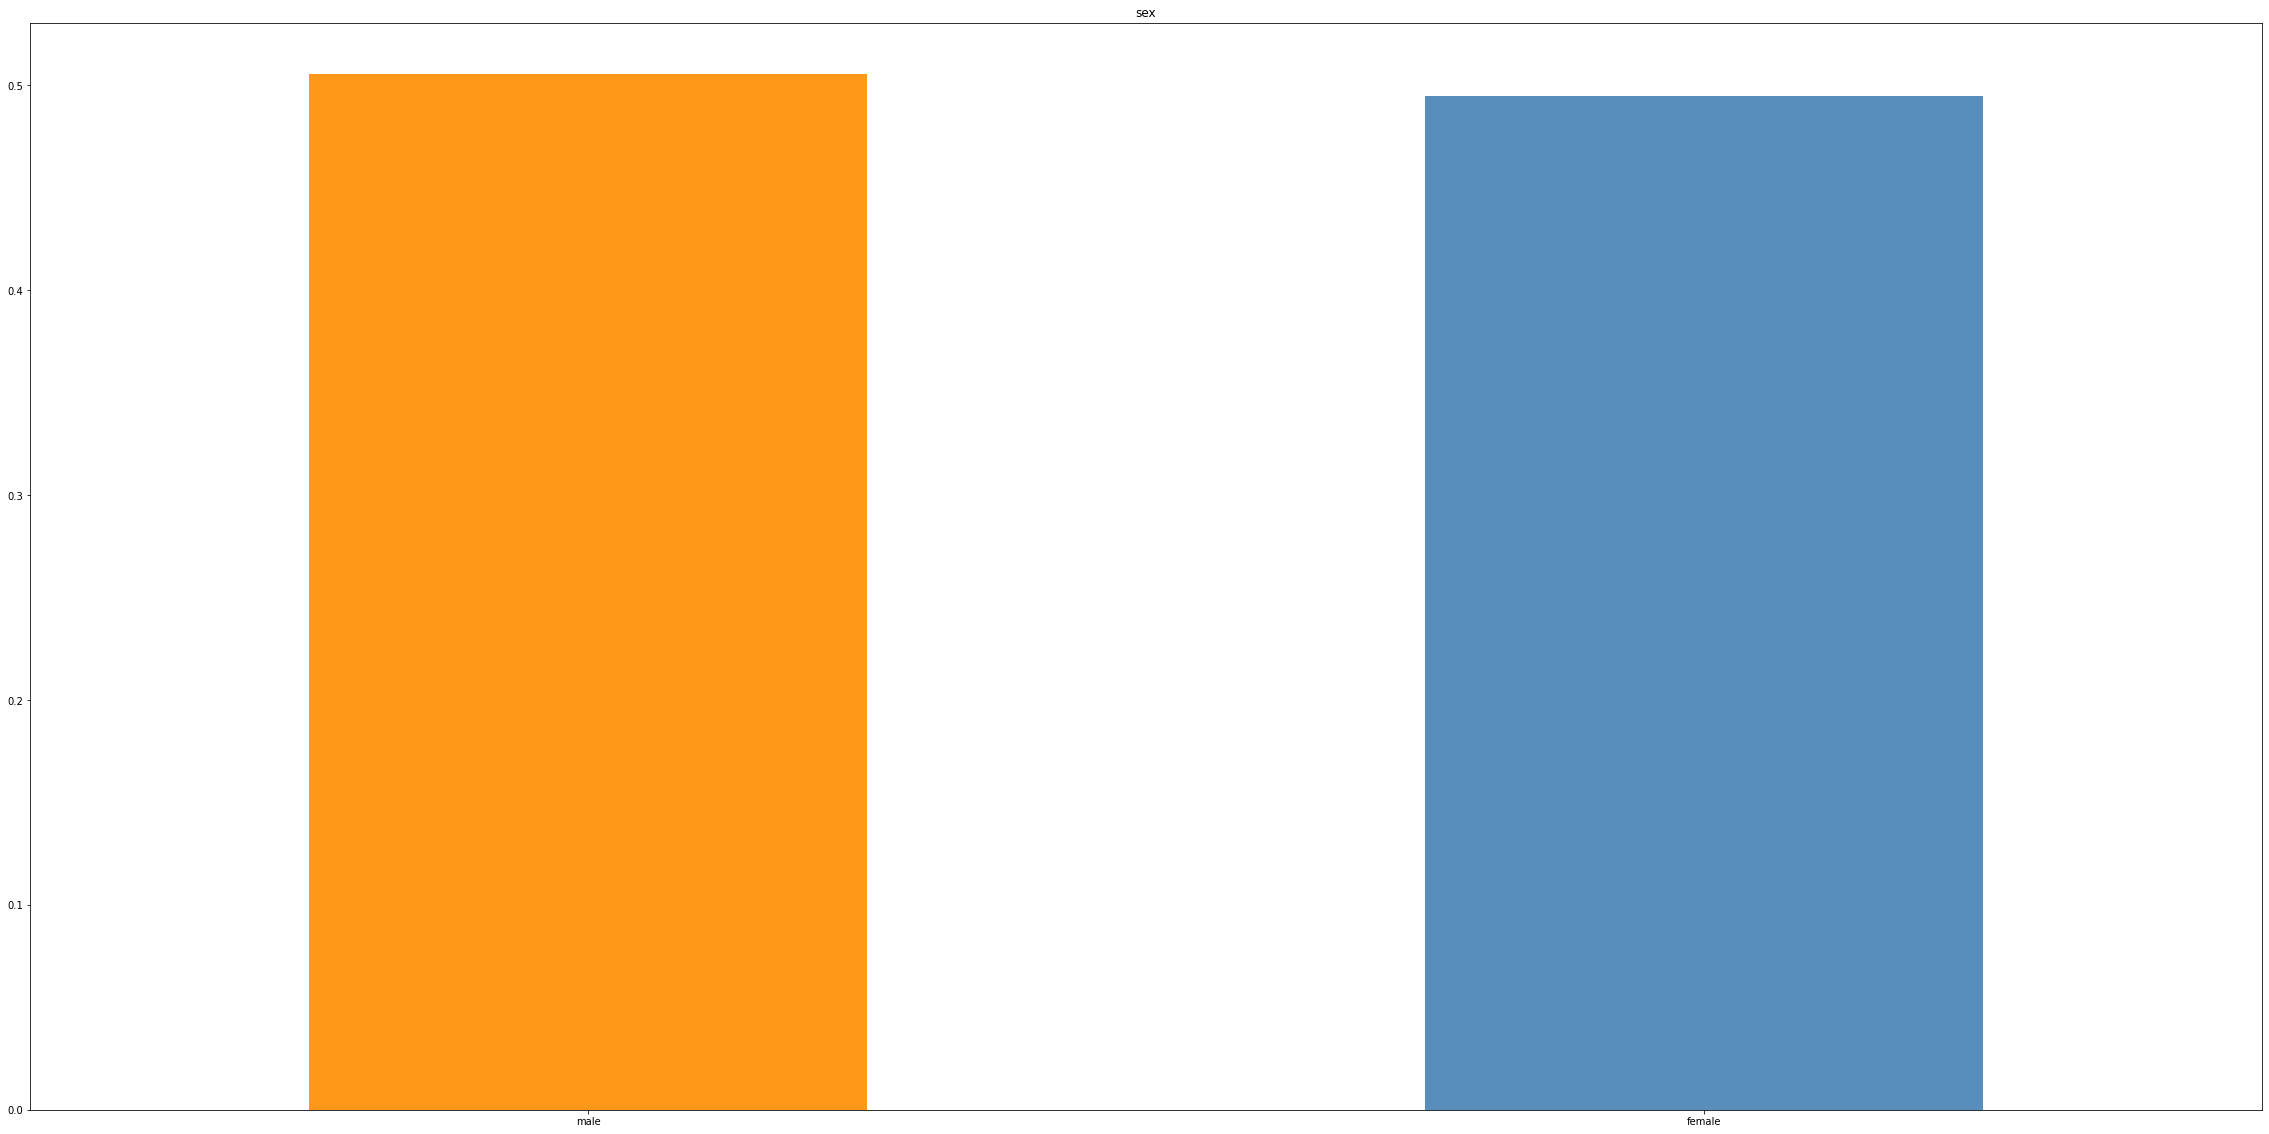

+-----+----------+
|     |   smoker |
|-----+----------|
| no  |     1064 |
| yes |      274 |
+-----+----------+


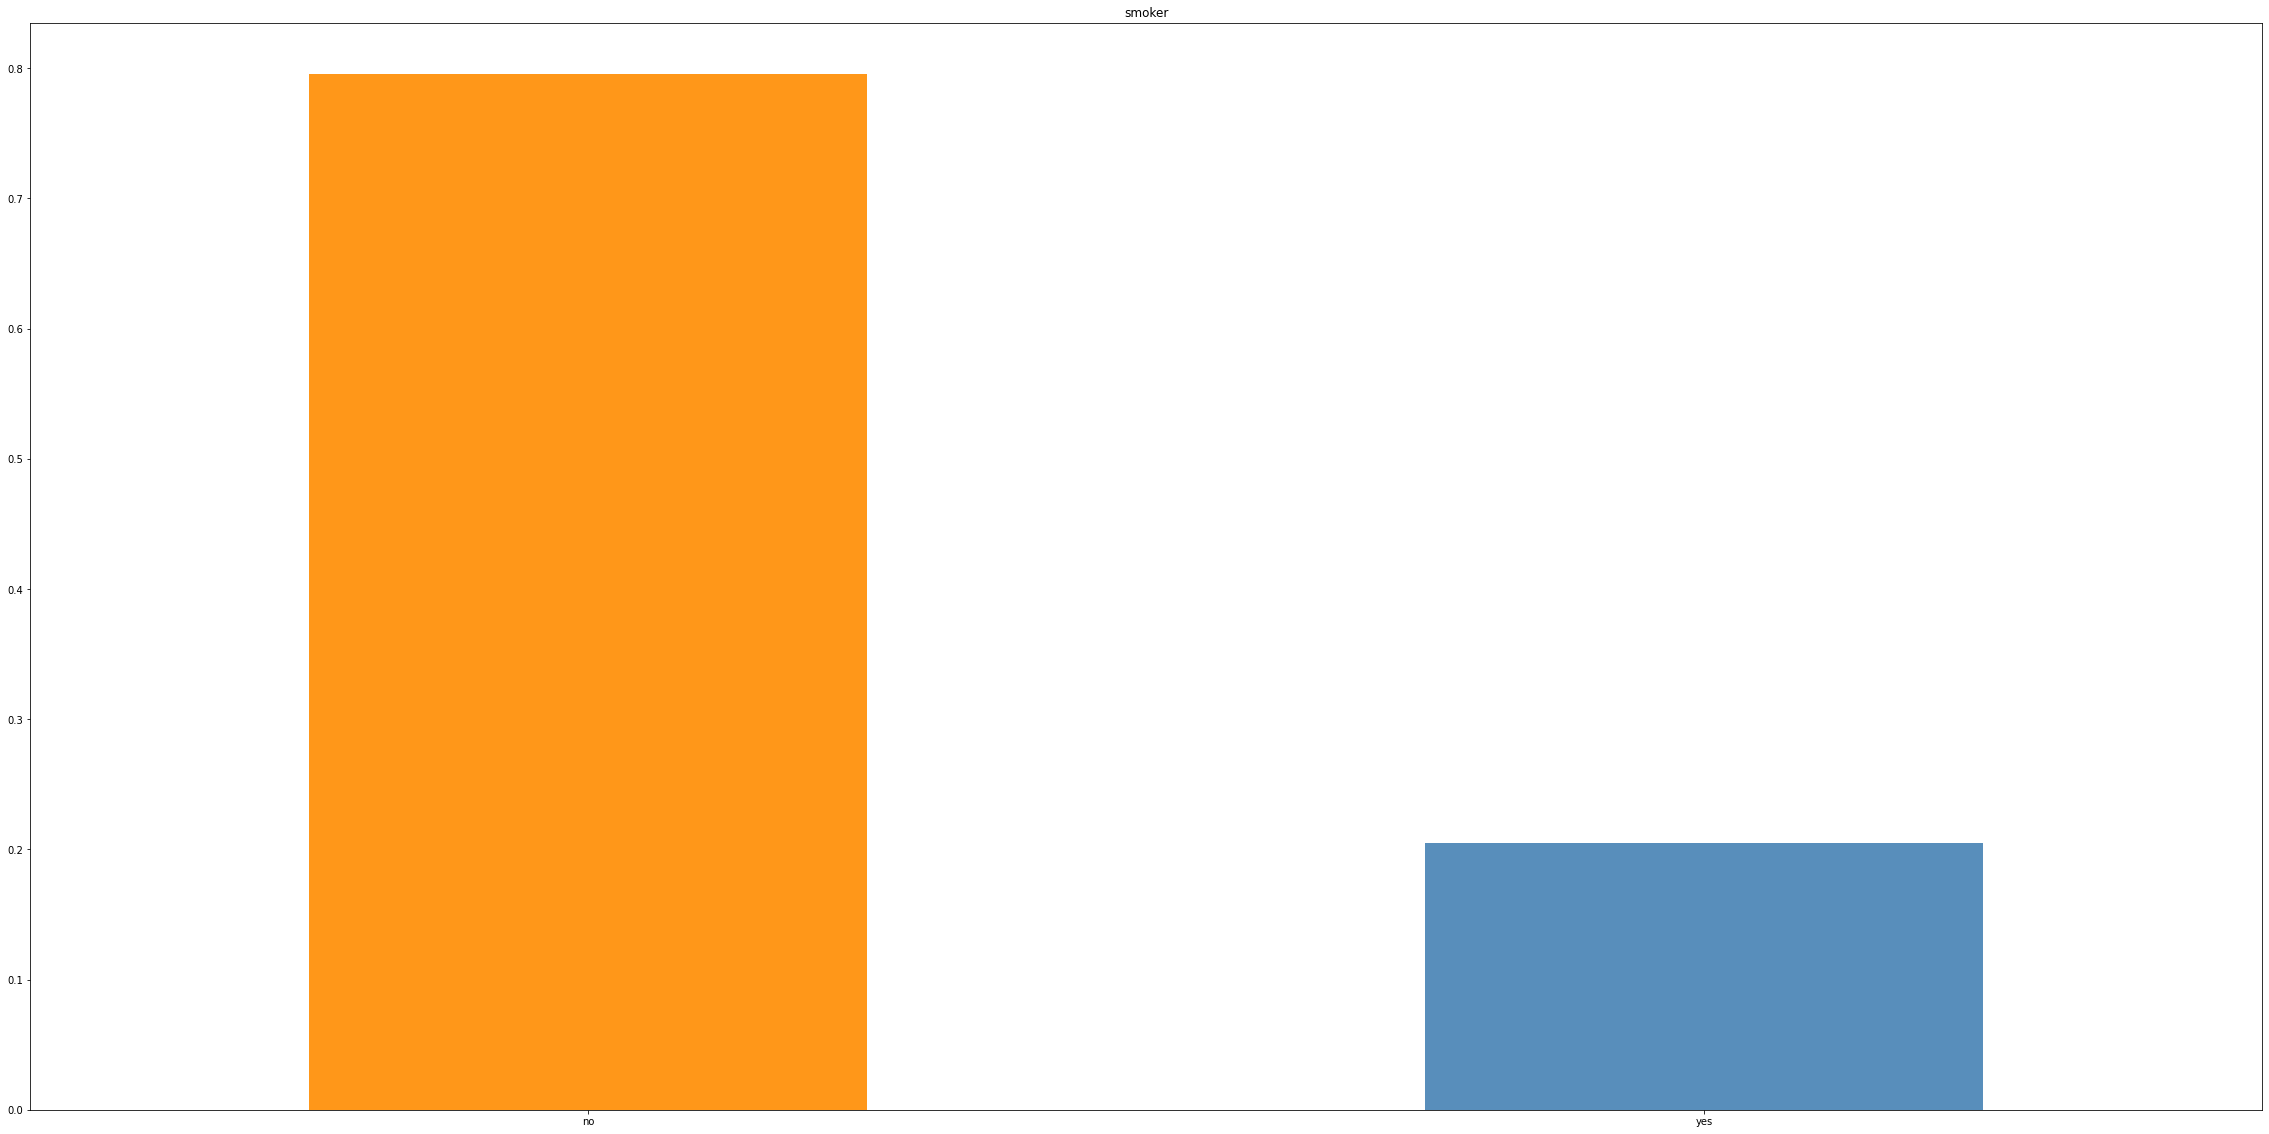

+-----------+----------+
|           |   region |
|-----------+----------|
| southeast |      364 |
| southwest |      325 |
| northwest |      325 |
| northeast |      324 |
+-----------+----------+


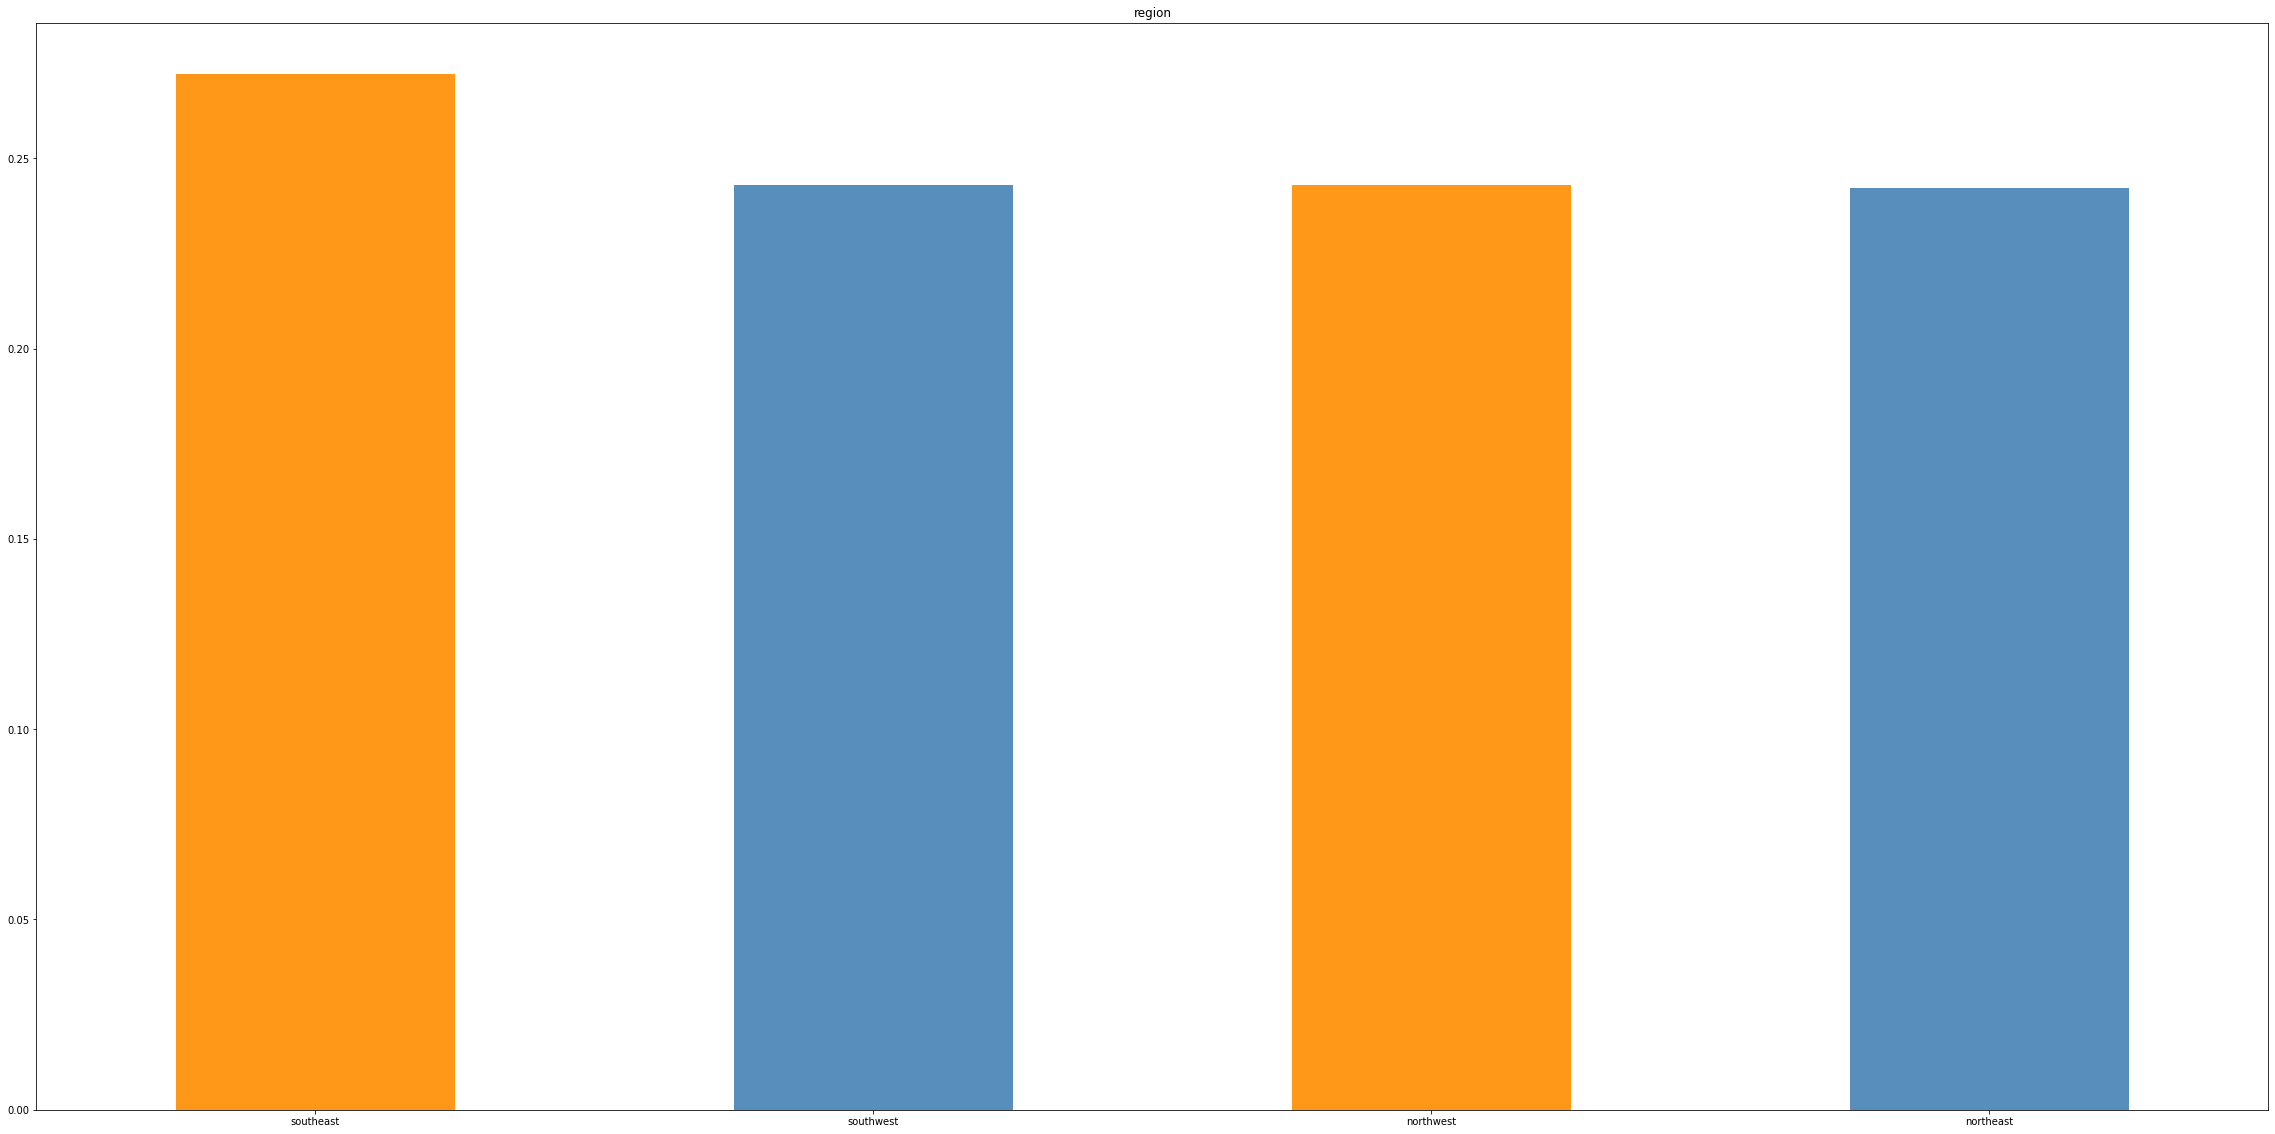

In [15]:
obj_EDA(df, Objcols)

### Independent Dependent Variables (Numerical)

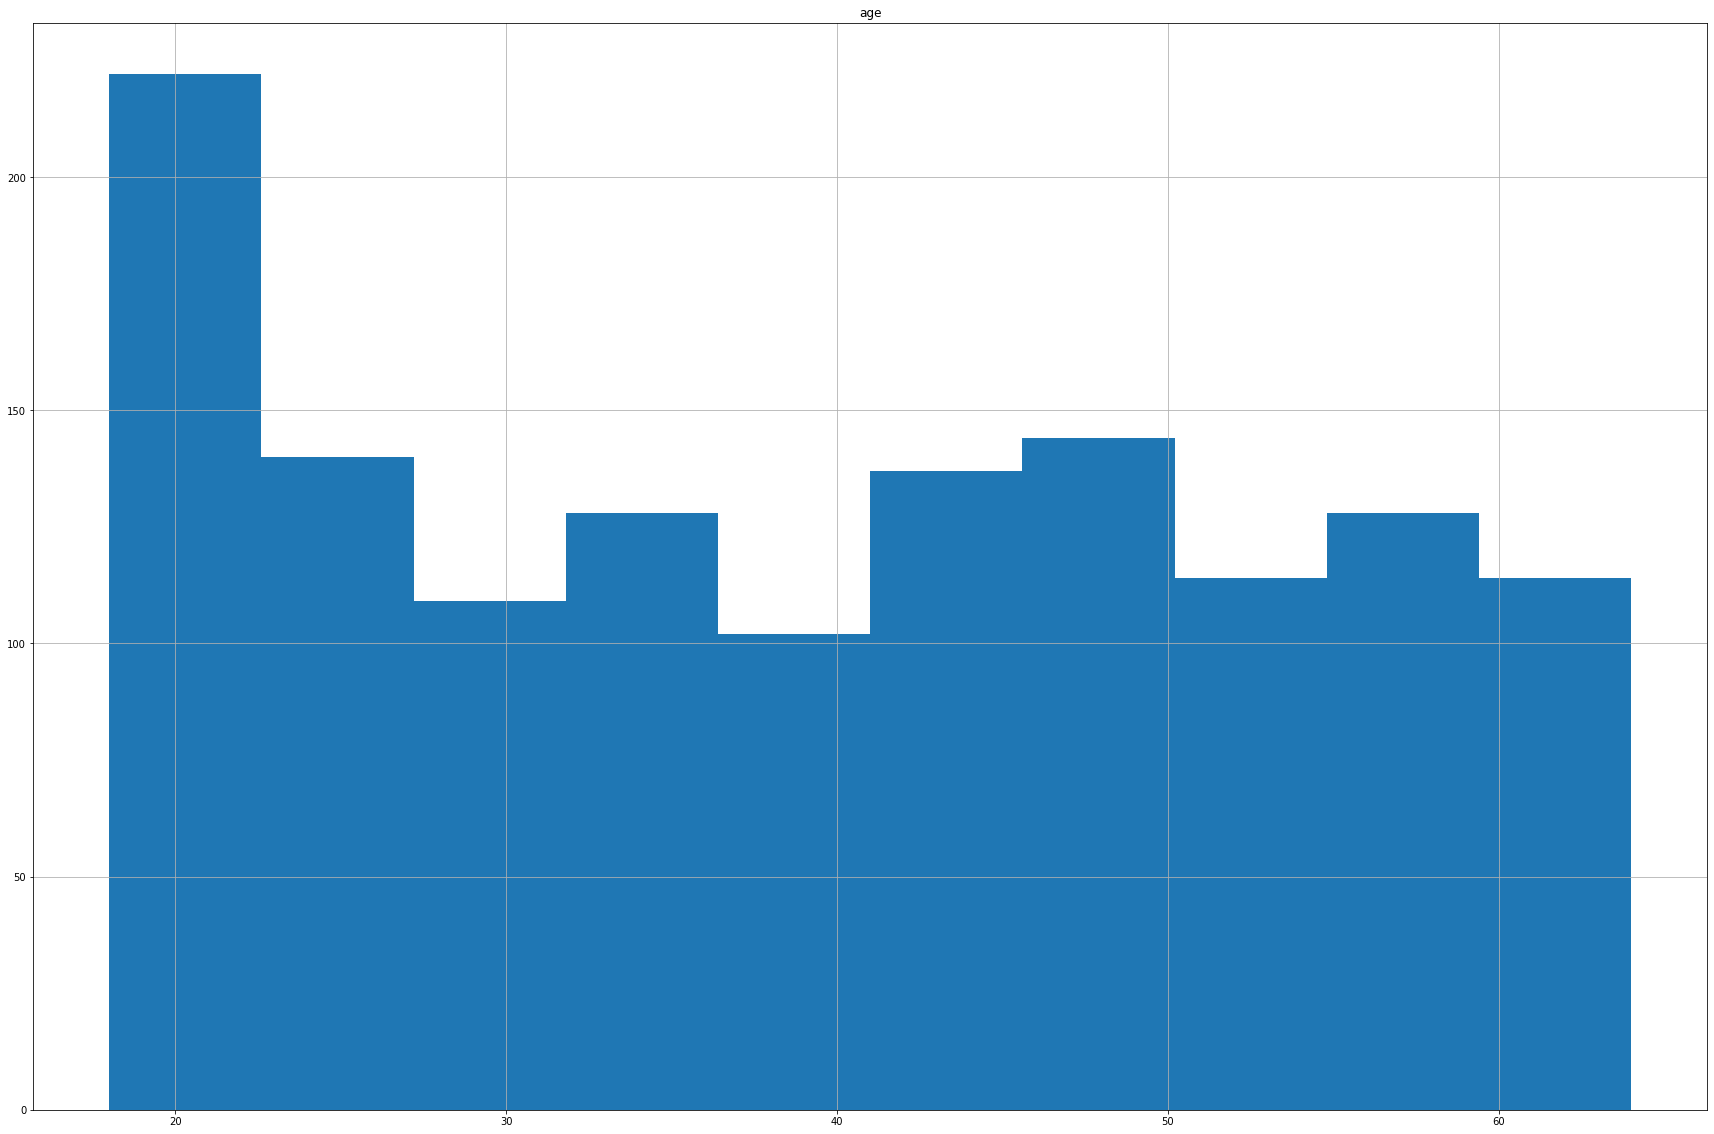

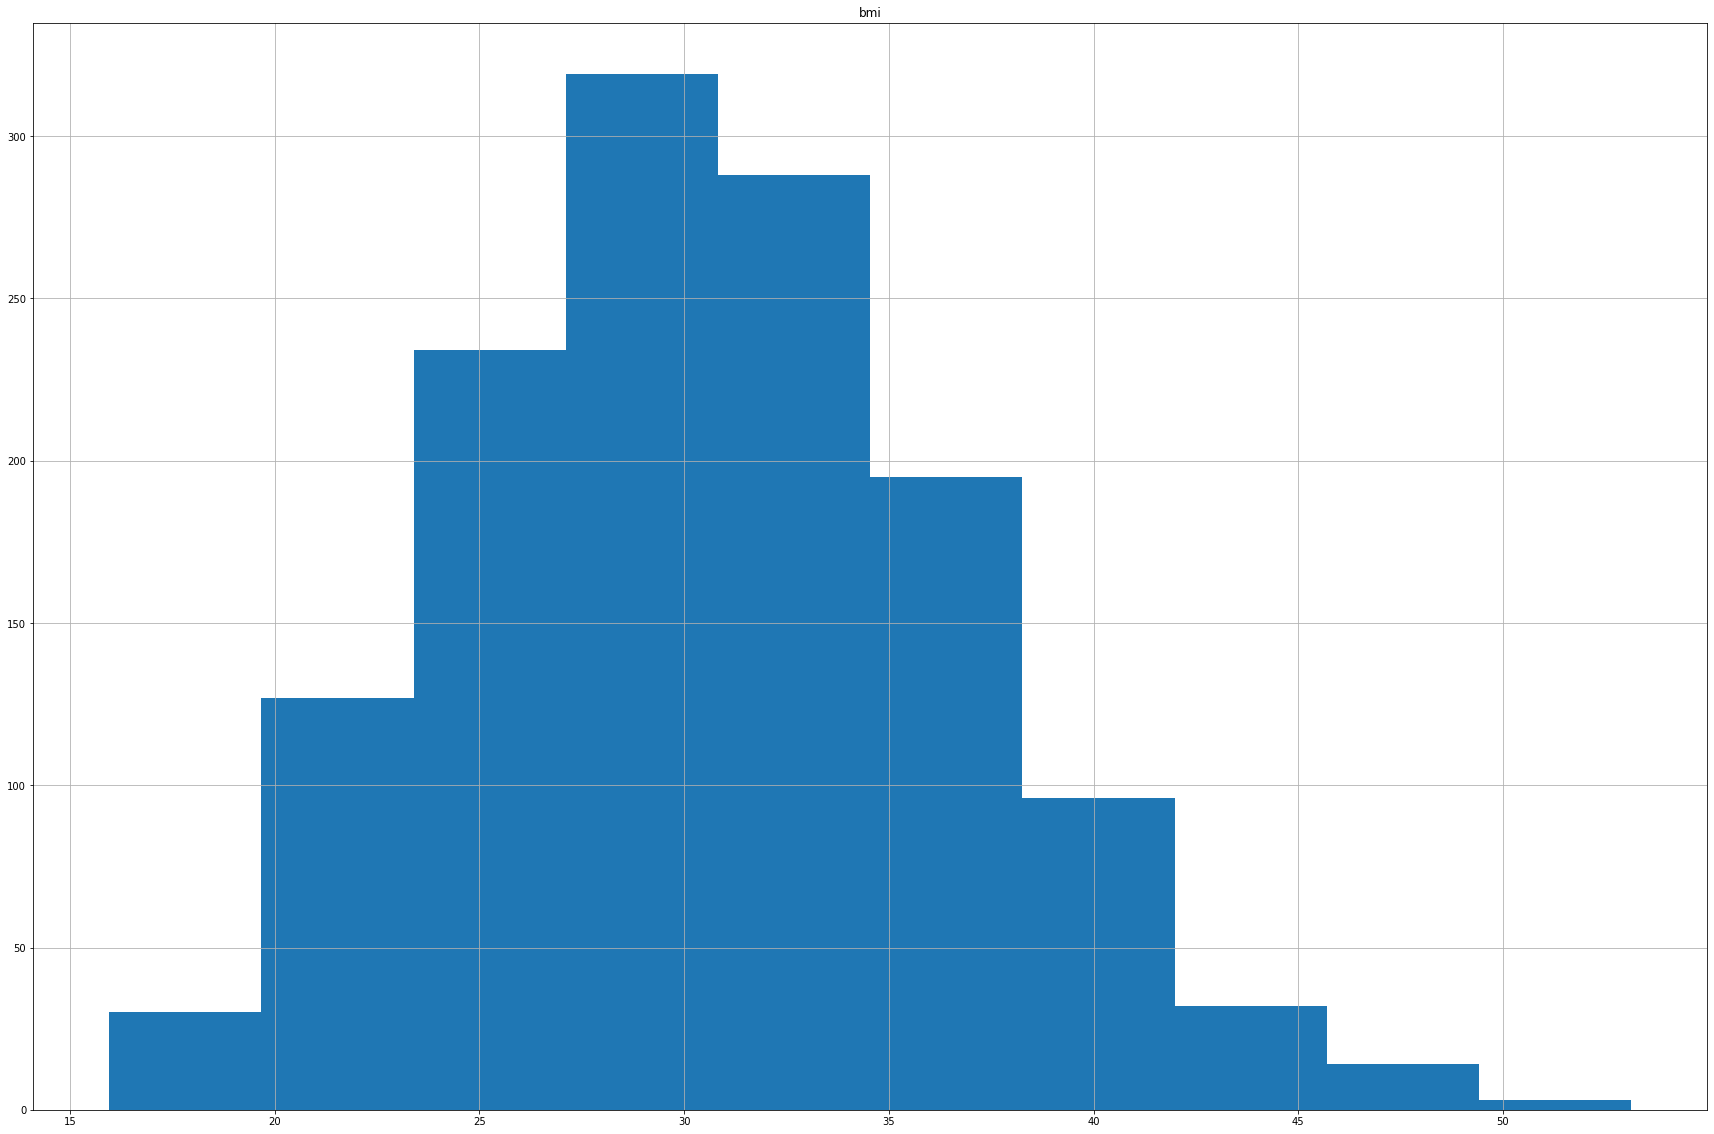

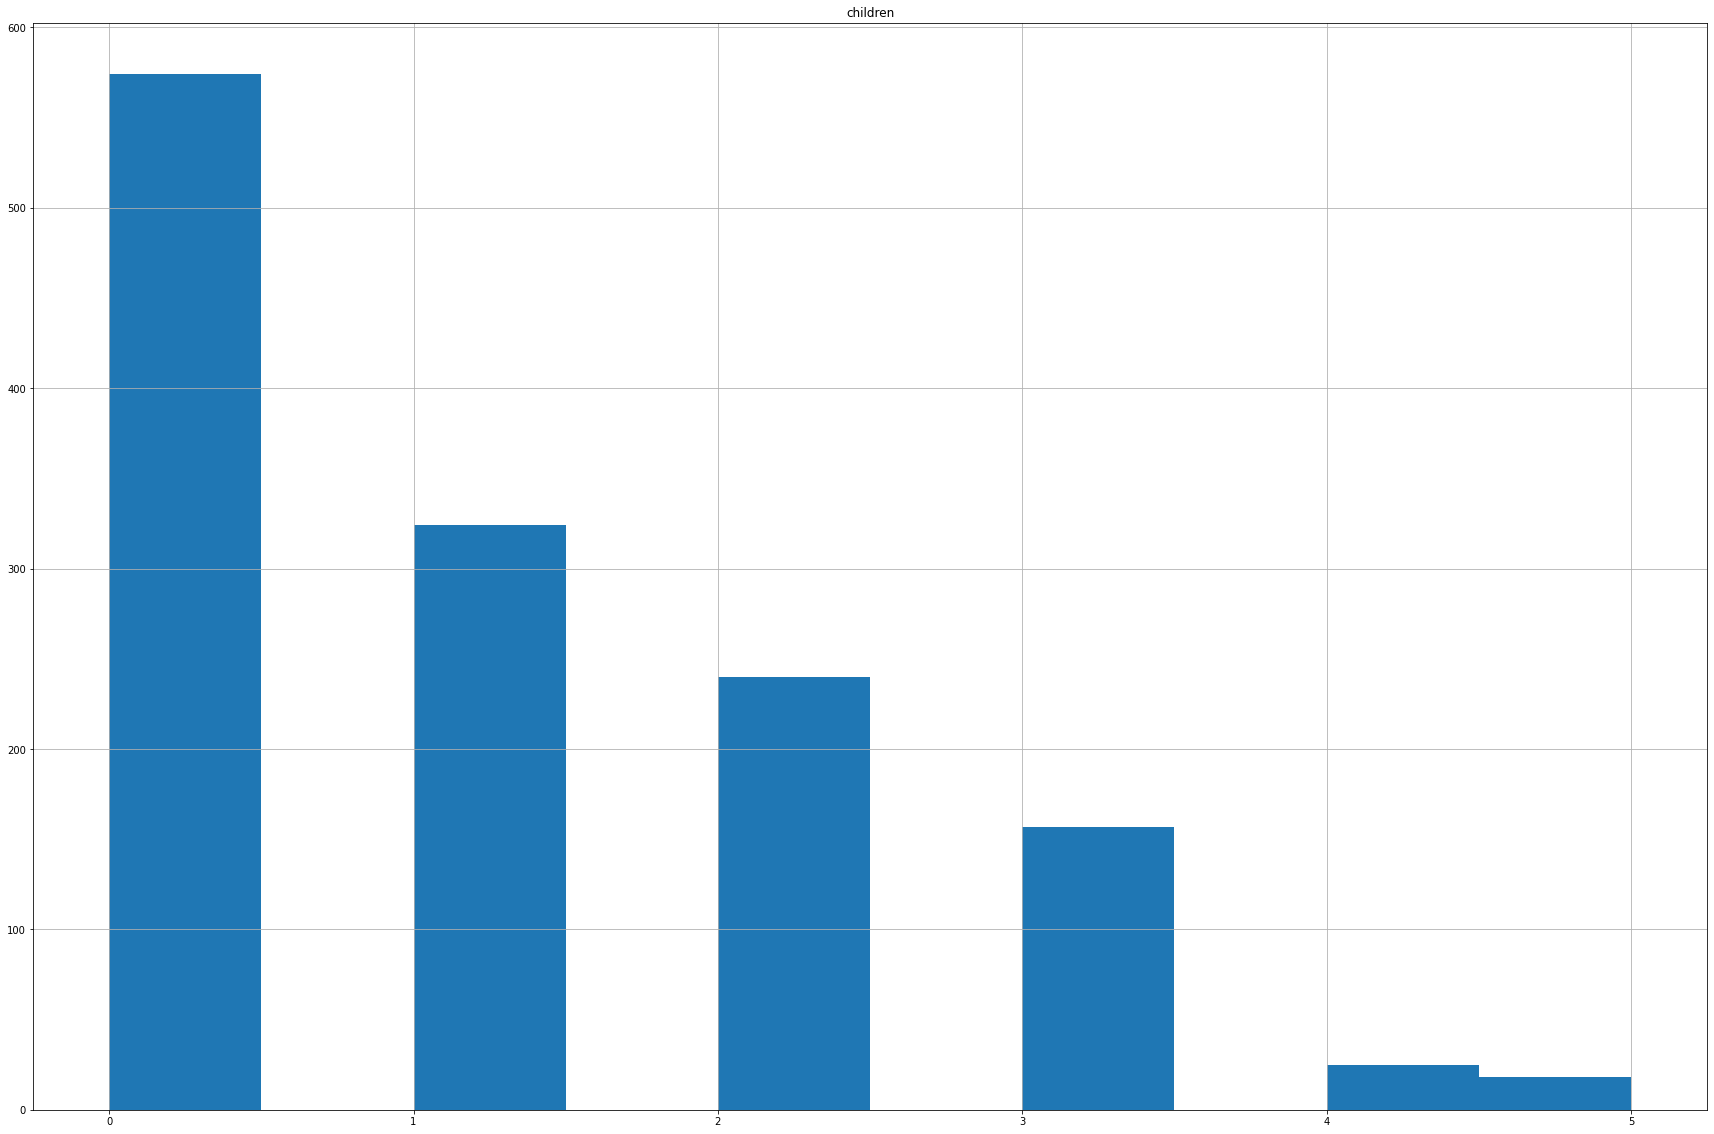

In [16]:
EDA_num(df, NUMcols)

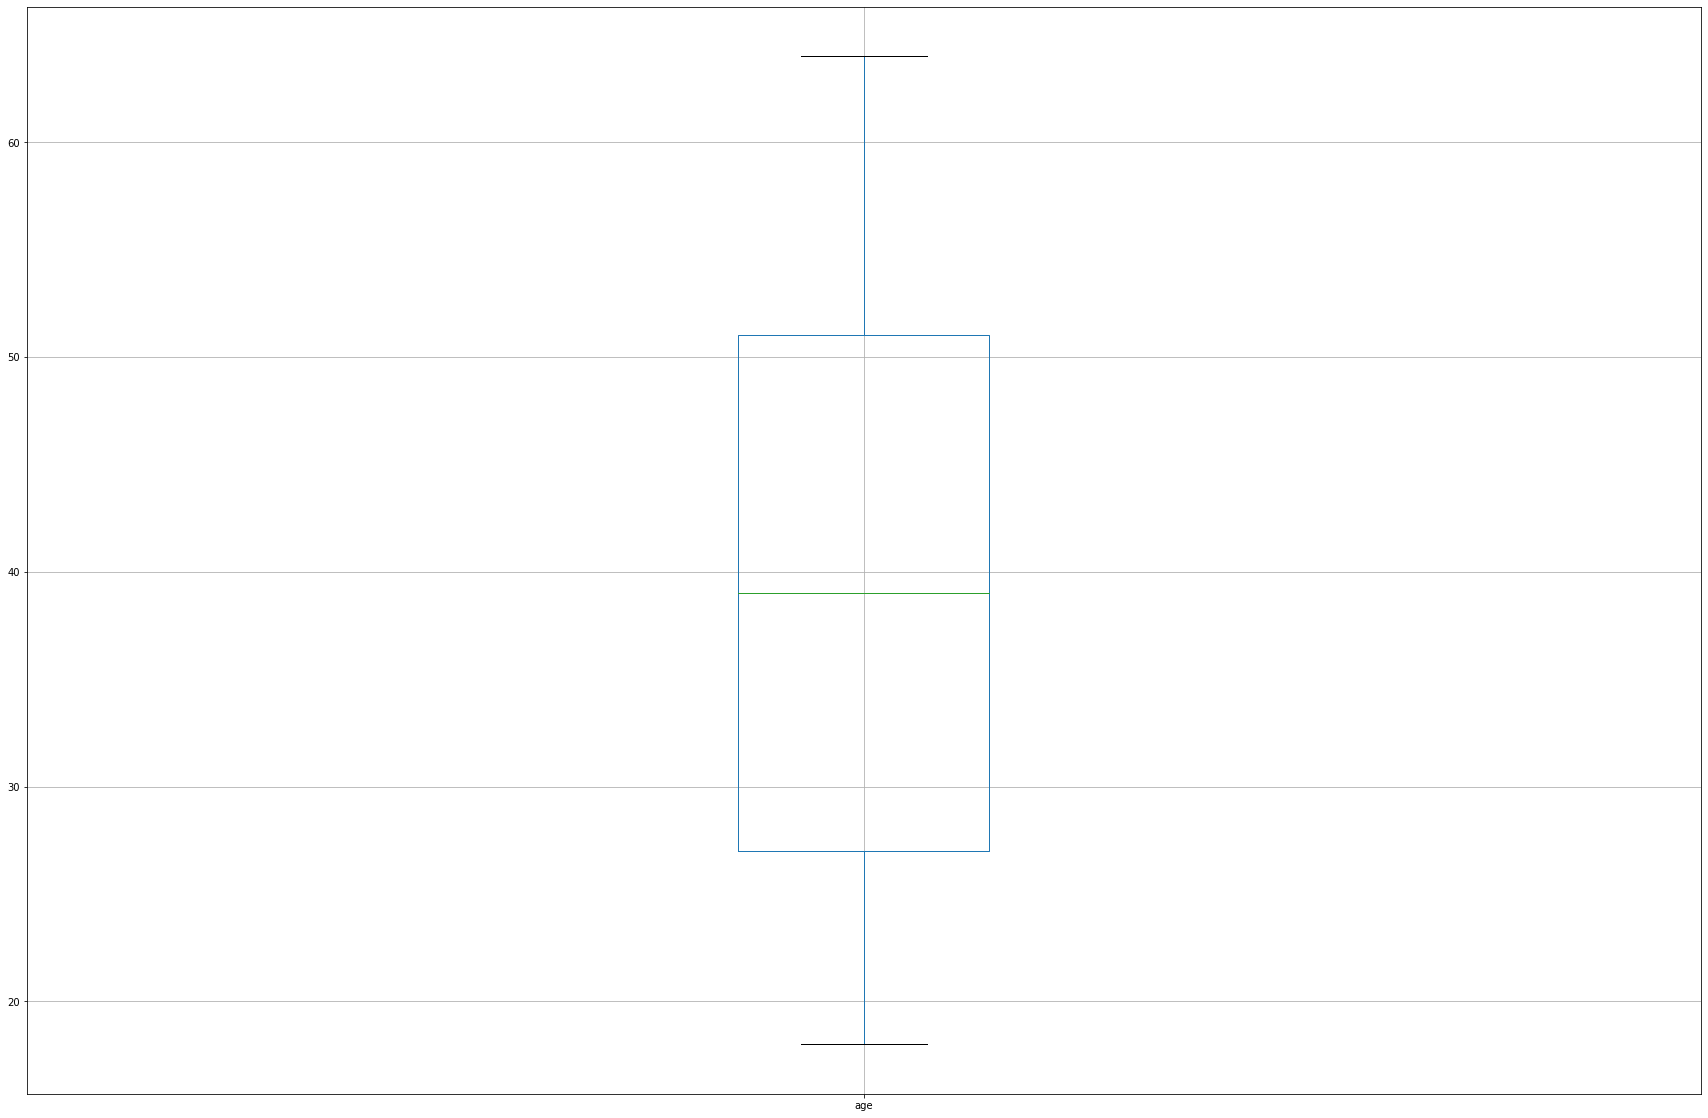

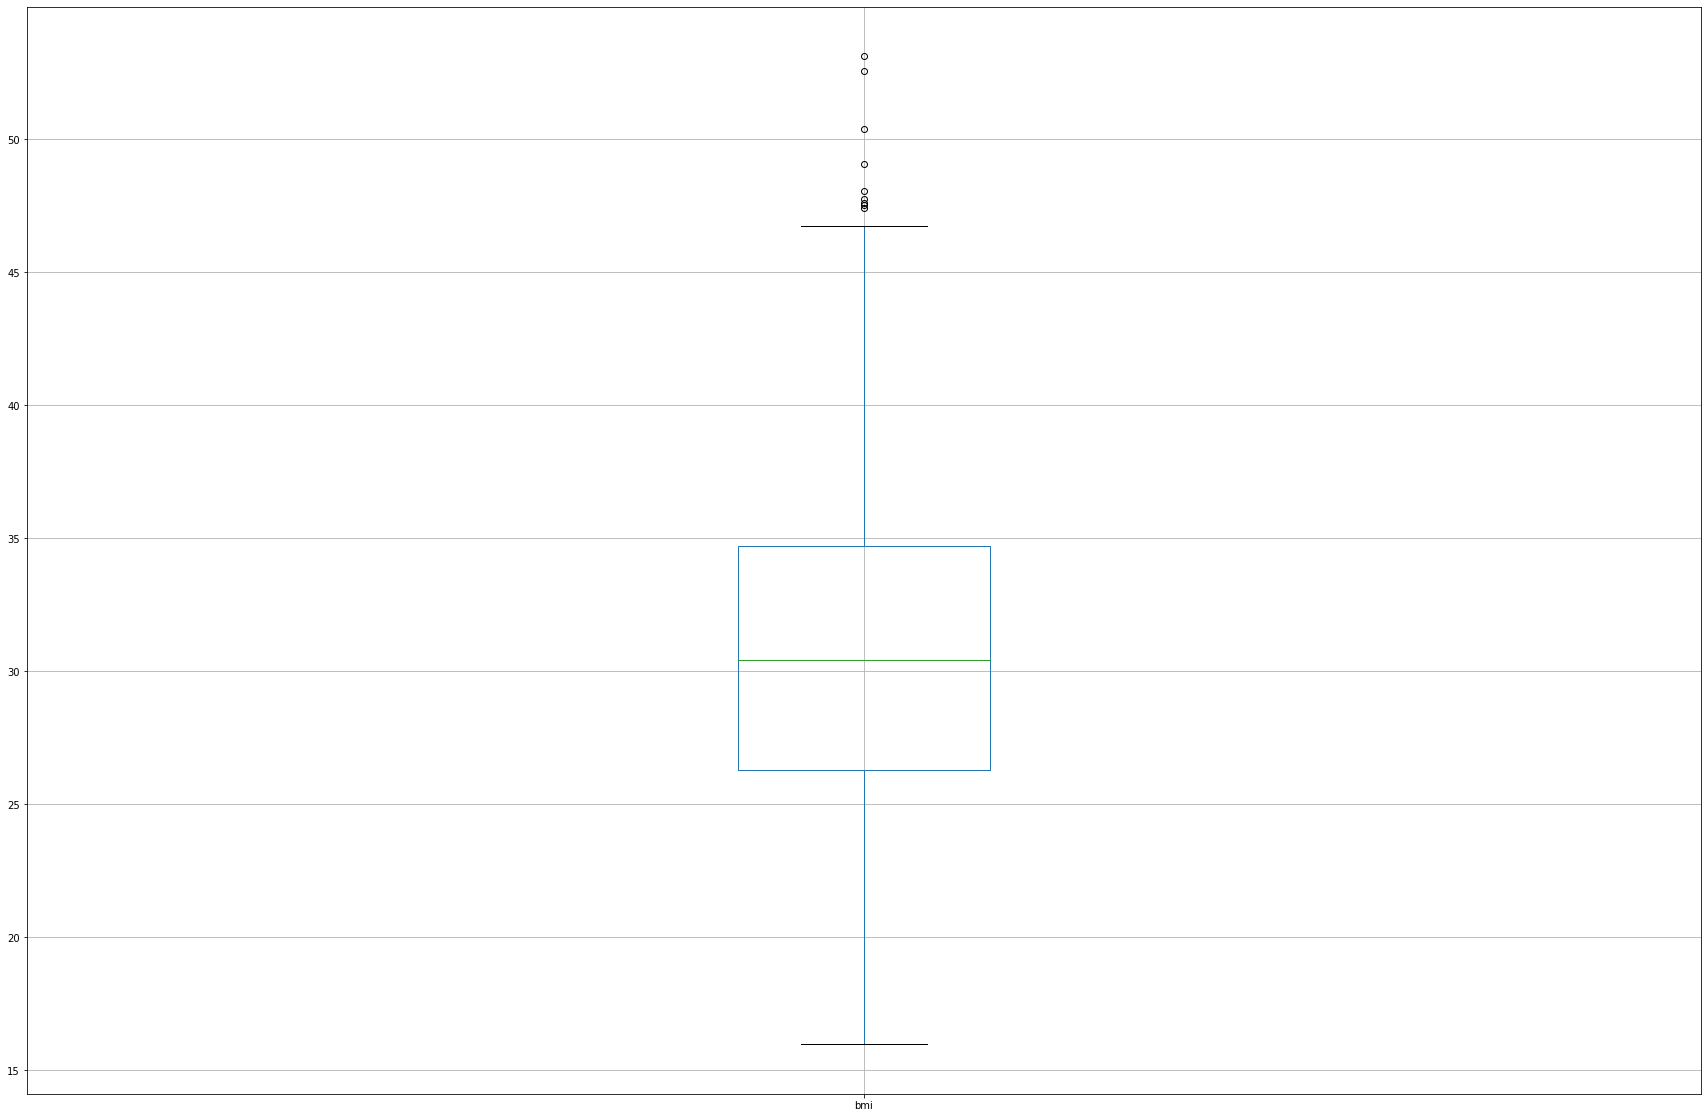

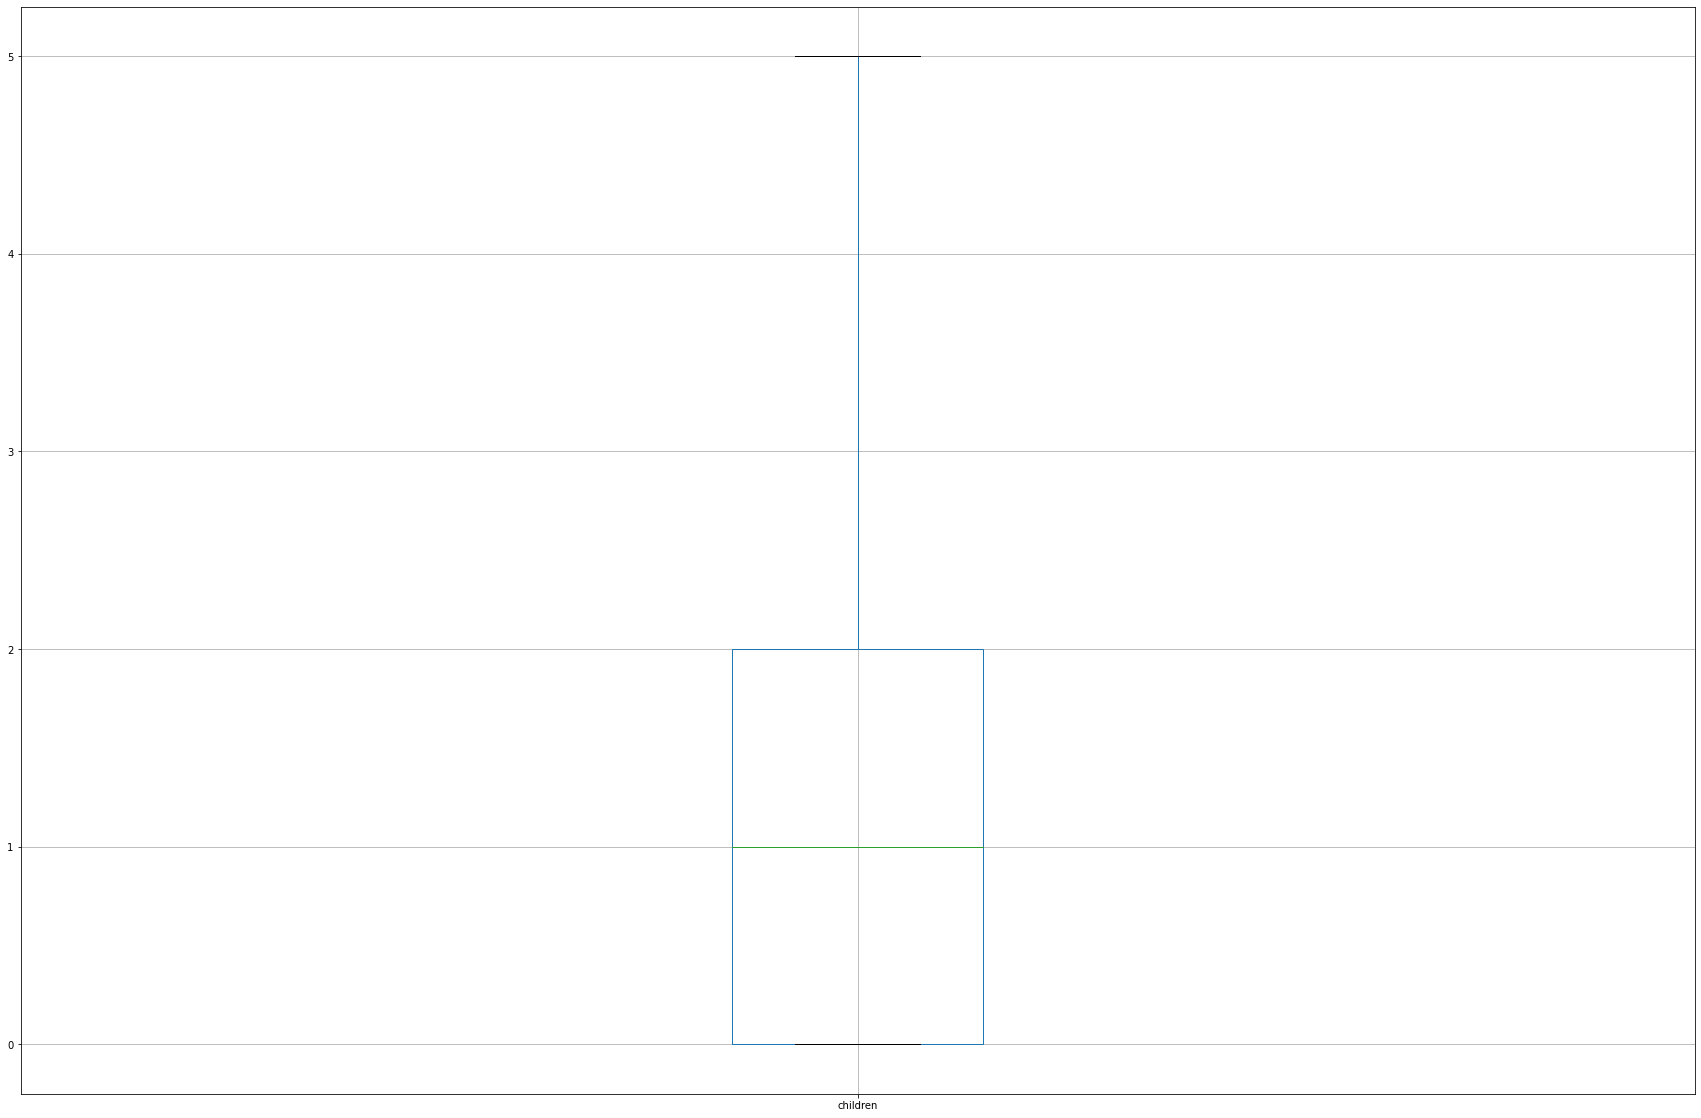

In [17]:
EDA_num_2(df, NUMcols)

# Data Transformation

In [18]:
if DT == 'StandardScaler' : 
    # StandardScaler
    df = NumStandardScaler(df)


Standardization Applied On: age

Standardization Applied On: bmi

Standardization Applied On: children

Standardization Applied On: charges


In [19]:
pd.DataFrame(df.head())

,age,sex,bmi,children,smoker,region,charges
0,-1.439,female,-0.453,-0.909,yes,southwest,0.299
1,-1.510,male,0.510,-0.079,no,southeast,-0.954
2,-0.798,male,0.383,1.581,no,southeast,-0.729
3,-0.442,male,-1.306,-0.909,no,northwest,0.720
4,-0.513,male,-0.293,-0.909,no,northwest,-0.777


# Feature Engineering 

In [20]:
if FE == 'LableEncodeing':
    df = df.apply(lambda x: AllObjLabelEncoder(x))


Lable Encoding Applied On: sex
New Value for sex  Variable: [0 1]
Old Value for sex Variable: ['female' 'male']

Lable Encoding Applied On: smoker
New Value for smoker  Variable: [0 1]
Old Value for smoker Variable: ['no' 'yes']

Lable Encoding Applied On: region
New Value for region  Variable: [0 1 2 3]
Old Value for region Variable: ['northeast' 'northwest' 'southeast' 'southwest']


In [21]:
pd.DataFrame(df.head())

,age,sex,bmi,children,smoker,region,charges
0,-1.439,0,-0.453,-0.909,1,3,0.299
1,-1.510,1,0.510,-0.079,0,2,-0.954
2,-0.798,1,0.383,1.581,0,2,-0.729
3,-0.442,1,-1.306,-0.909,0,1,0.720
4,-0.513,1,-0.293,-0.909,0,1,-0.777


# Feature Selection

In [22]:
fs = None

if FS == 'Forward':
    df, fs = Feature_selection_forward(df, target)

All the Num Variables: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

All the obj Variables: []


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   14.9s finished

[2022-07-20 02:44:52] Features: 1/6 -- score: -0.38754337483669055[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.3s finished

[2022-07-20 02:45:00] Features: 2/6 -- score: -0.3316118795002746[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.1s finished

[2022-07-20 02:45:08] Features: 3/6 -- score: -0.19211376871951263[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done


Most Variables Can Effect The Target Variables:  ['age', 'bmi', 'children', 'smoker', 'region']

With Highest Score:  -0.1695598302227142

All the Variables Selected:  ['age', 'bmi', 'children', 'smoker', 'region', 'charges']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished

[2022-07-20 02:45:22] Features: 6/6 -- score: -0.17009421141912306

In [23]:
pd.DataFrame(fs)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(4,)","[-0.37009892982711023, -0.38916166709569106, -0.3635594852276959, -0.44209342165718124, -0.37280337037577443]",-0.388,"(smoker,)",0.037,0.029,0.014
2,"(2, 4)","[-0.34416789704359896, -0.30811142541732706, -0.3395107288498616, -0.3417524465733027, -0.32451689961728253]",-0.332,"(bmi, smoker)",0.017,0.014,0.007
3,"(0, 2, 4)","[-0.20652148221001068, -0.14437426018182334, -0.17827900388293763, -0.24620068643223236, -0.18519341089055907]",-0.192,"(age, bmi, smoker)",0.043,0.034,0.017
4,"(0, 2, 4, 5)","[-0.1998346260734629, -0.1327967526773593, -0.15959936324707175, -0.22741980535470854, -0.1705375908092732]",-0.178,"(age, bmi, smoker, region)",0.042,0.033,0.016
5,"(0, 2, 3, 4, 5)","[-0.17693826192917256, -0.11258539661326943, -0.18222702298978413, -0.2109281123008297, -0.16512035728051508]",-0.170,"(age, bmi, children, smoker, region)",0.041,0.032,0.016
6,"(0, 1, 2, 3, 4, 5)","[-0.17454193067693752, -0.10982490455654939, -0.18641827367062727, -0.20592091802958765, -0.17376503016191347]",-0.170,"(age, sex, bmi, children, smoker, region)",0.042,0.032,0.016


In [24]:
pd.DataFrame(df.head())

,age,bmi,children,smoker,region,charges
0,-1.439,-0.453,-0.909,1,3,0.299
1,-1.510,0.510,-0.079,0,2,-0.954
2,-0.798,0.383,1.581,0,2,-0.729
3,-0.442,-1.306,-0.909,0,1,0.720
4,-0.513,-0.293,-0.909,0,1,-0.777


# Statistics Analytics

## Correlation between Independent Dependent Variables and Dependent Variables

In [25]:
pd.DataFrame(df.corr()[target].sort_values(ascending = False).reset_index())

,index,charges
0,charges,1.000
1,smoker,0.787
2,age,0.299
3,bmi,0.198
4,children,0.068
5,region,-0.006


## Correlation between all the Variables

In [26]:
pd.DataFrame(df.corr())

,age,bmi,children,smoker,region,charges
age,1.000,0.109,0.042,-0.025,0.002,0.299
bmi,0.109,1.000,0.013,0.004,0.158,0.198
children,0.042,0.013,1.000,0.008,0.017,0.068
smoker,-0.025,0.004,0.008,1.000,-0.002,0.787
region,0.002,0.158,0.017,-0.002,1.000,-0.006
charges,0.299,0.198,0.068,0.787,-0.006,1.000


In [27]:
df.corr().style.background_gradient(cmap="Blues") # YlOrBr Greys GnBu

,age,bmi,children,smoker,region,charges
age,1.000000,0.109272,0.042469,-0.025019,0.002127,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.198341,0.067998,0.787251,-0.006208,1.000000


# Data Splitting 

In [28]:
X = df.drop(target, axis=1)
y = df[target]

if Random == 'Enable': 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=Split_size, random_state=Randon_state_size)

print('X_train Rows size: ', X_train.shape[0])
print('X_train Columns size: ', X_train.shape[1])
print('\ny_train Rows size: ', y_train.shape[0])
print('\nX_test Rows size: ', X_test.shape[0])
print('X_test Columns size: ', X_test.shape[1])
print('\ny_test Rows size: ', y_test.shape[0])

X_train Rows size:  1137
X_train Columns size:  5

y_train Rows size:  1137

X_test Rows size:  201
X_test Columns size:  5

y_test Rows size:  201


# Machine Learning Models 

## Build the Machine Learning Models on 

In [29]:
if ML_ST == 'Enable':

    # Random Forest Regressor
    rf_ST = RandomForestRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nRandom Forest Regressor model trained')

    # Gradient Boosting Regressor
    gb_ST = GradientBoostingRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nGradient Boosting Regressor model trained')

    # Histogram-based Gradient Boosting Regression
    hgb_ST = HistGradientBoostingRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nHistogram-based Gradient Boosting Regression model trained')

    # AdaBoost Regressor
    ad_ST = AdaBoostRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nAdaBoost Regressor model trained')

    # Extra Trees Regressor
    et_ST = ExtraTreesRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nExtra Trees Regressor model trained')

    # K Neighbors Regressor
    knn_ST = KNeighborsRegressor().fit(X_train, y_train)
    print ('\nK Neighbors Regressor model trained')

    # Decision Tree Regressor
    dt_ST = DecisionTreeRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nDecision Tree Regressor model trained')

    # XGBoost Regressors
    xgb_ST = XGBRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nXGBoost Regressors model trained')

    # Support Vector Machines Regressors
    svm_ST = SVR().fit(X_train, y_train)
    print ('\nSupport Vector Machines Regressors model trained')

    # Linear Support Vector Regression
    lsvm_ST = LinearSVR(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nLinear Support Vector Regression model trained')

    # Multilayer Perceptron Regressor
    mlp_ST = MLPRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nMultilayer Perceptron Regressor model trained')


Random Forest Regressor model trained

Gradient Boosting Regressor model trained

Histogram-based Gradient Boosting Regression model trained

AdaBoost Regressor model trained

Extra Trees Regressor model trained

K Neighbors Regressor model trained

Decision Tree Regressor model trained
[02:45:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBoost Regressors model trained

Support Vector Machines Regressors model trained

Linear Support Vector Regression model trained

Multilayer Perceptron Regressor model trained


## Predict y_test Using Machine Learning  Models

In [30]:
if ML_ST == 'Enable':

    # Random Forest Regressor
    rf_ST_pred = rf_ST.predict(X_test)
    print ('\nPredict y_test using Random Forest Regressor model')

    # Gradient Boosting Regressor
    gb_ST_pred = gb_ST.predict(X_test)
    print ('\nPredict y_test using Gradient Boosting Regressor model done')

    # Histogram-based Gradient Boosting Regression Tree
    hgb_ST_pred = hgb_ST.predict(X_test)
    print ('\nPredict y_test using Histogram-based Gradient Boosting Regression model done')

    # AdaBoost Regressor
    ad_ST_pred = ad_ST.predict(X_test)
    print ('\nPredict y_test using AdaBoost Regressor model done')

    # Extra Trees Regressor
    et_ST_pred = et_ST.predict(X_test)
    print ('\nPredict y_test using Extra Trees Regressor model done')

    # K Neighbors Regressor
    knn_ST_pred = knn_ST.predict(X_test)
    print ('\nPredict y_test using K Neighbors Regressor model done')

    # Decision Tree Regressor
    dt_ST_pred = dt_ST.predict(X_test)
    print ('\nPredict y_test using Decision Tree Regressor model done')

    # XGBoost Regressors
    xgb_ST_pred = xgb_ST.predict(X_test)
    print ('\nPredict y_test using XGBoost Regressors model done')

    # Support Vector Machines Regressors
    svm_ST_pred = svm_ST.predict(X_test)
    print ('\nPredict y_test using Support Vector Machines Regressors model done')

    # Linear Support Vector Regression
    lsvm_ST_pred = lsvm_ST.predict(X_test)
    print ('\nPredict y_test using Linear Support Vector Regression model done')

    # Multilayer Perceptron Regressor
    mlp_ST_pred = mlp_ST.predict(X_test)
    print ('\nPredict y_test using Multilayer Perceptron Regressor model done')


Predict y_test using Random Forest Regressor model

Predict y_test using Gradient Boosting Regressor model done

Predict y_test using Histogram-based Gradient Boosting Regression model done

Predict y_test using AdaBoost Regressor model done

Predict y_test using Extra Trees Regressor model done

Predict y_test using K Neighbors Regressor model done

Predict y_test using Decision Tree Regressor model done

Predict y_test using XGBoost Regressors model done

Predict y_test using Support Vector Machines Regressors model done

Predict y_test using Linear Support Vector Regression model done

Predict y_test using Multilayer Perceptron Regressor model done


## Evaluate the Models 

### Random Forest Regressor

In [31]:
if ML_ST == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_rf_ST = mean_absolute_error(y_test, rf_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_rf_ST = mean_squared_error(y_test, rf_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_rf_ST = mean_squared_error(y_test, rf_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_rf_ST = explained_variance_score(y_test, rf_ST_pred)

    # Max Error
    max_error_rf_ST = max_error(y_test, rf_ST_pred)

    # Median Absolute Error
    median_absolute_error_rf_ST = median_absolute_error(y_test, rf_ST_pred)

    # R^2
    r2_score_rf_ST = r2_score(y_test, rf_ST_pred)

    _rf_ST_valid_compare = pd.DataFrame({"Random Forest Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_rf_ST, 
                                                mean_squared_error_rf_ST,
                                                Root_mean_squared_error_rf_ST,
                                                explained_variance_score_rf_ST,
                                                max_error_rf_ST,
                                                median_absolute_error_rf_ST,
                                                r2_score_rf_ST,
                                                ],
                                        })  
    print(tabulate(_rf_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------------------------+------------+
|    | Random Forest Regressor Standered Models   |   Accuracy |
|----+--------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                  |  0.20935   |
|  1 | Mean Squared Error (MSE)                   |  0.144418  |
|  2 | Root Mean Squared Error (RMSE)             |  0.380024  |
|  3 | Explained Variance Score                   |  0.863748  |
|  4 | Max Error                                  |  1.77539   |
|  5 | Median Absolute Error                      |  0.0762792 |
|  6 | R^2                                        |  0.861011  |
+----+--------------------------------------------+------------+


### Gradient Boosting Regressor

In [32]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_gb_ST = mean_absolute_error(y_test, gb_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_gb_ST = mean_squared_error(y_test, gb_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_gb_ST = mean_squared_error(y_test, gb_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_gb_ST = explained_variance_score(y_test, gb_ST_pred)

    # Max Error
    max_error_gb_ST = max_error(y_test, gb_ST_pred)

    # Median Absolute Error
    median_absolute_error_gb_ST = median_absolute_error(y_test, gb_ST_pred)

    # R^2
    r2_score_gb_ST = r2_score(y_test, gb_ST_pred)

    _gb_ST_valid_compare = pd.DataFrame({"Gradient Boosting Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_gb_ST, 
                                                mean_squared_error_gb_ST,
                                                Root_mean_squared_error_gb_ST,
                                                explained_variance_score_gb_ST,
                                                max_error_gb_ST,
                                                median_absolute_error_gb_ST,
                                                r2_score_gb_ST,
                                                ],
                                        })  
    print(tabulate(_gb_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------------+------------+
|    | Gradient Boosting Regressor Standered Models   |   Accuracy |
|----+------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                      |   0.194735 |
|  1 | Mean Squared Error (MSE)                       |   0.126775 |
|  2 | Root Mean Squared Error (RMSE)                 |   0.356054 |
|  3 | Explained Variance Score                       |   0.878642 |
|  4 | Max Error                                      |   1.76505  |
|  5 | Median Absolute Error                          |   0.123757 |
|  6 | R^2                                            |   0.877992 |
+----+------------------------------------------------+------------+


### Histogram-based Gradient Boosting Regressor

In [33]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_hgb_ST = mean_absolute_error(y_test, hgb_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_hgb_ST = mean_squared_error(y_test, hgb_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_hgb_ST = mean_squared_error(y_test, hgb_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_hgb_ST = explained_variance_score(y_test, hgb_ST_pred)

    # Max Error
    max_error_hgb_ST = max_error(y_test, hgb_ST_pred)

    # Median Absolute Error
    median_absolute_error_hgb_ST = median_absolute_error(y_test, hgb_ST_pred)

    # R^2
    r2_score_hgb_ST = r2_score(y_test, hgb_ST_pred)

    _hgb_ST_valid_compare = pd.DataFrame({"Histogram-based Gradient Boosting Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_hgb_ST, 
                                                mean_squared_error_hgb_ST,
                                                Root_mean_squared_error_hgb_ST,
                                                explained_variance_score_hgb_ST,
                                                max_error_hgb_ST,
                                                median_absolute_error_hgb_ST,
                                                r2_score_hgb_ST,
                                                ],
                                        })  
    print(tabulate(_hgb_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+----------------------------------------------------------------+------------+
|    | Histogram-based Gradient Boosting Regressor Standered Models   |   Accuracy |
|----+----------------------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                                      |   0.211807 |
|  1 | Mean Squared Error (MSE)                                       |   0.133453 |
|  2 | Root Mean Squared Error (RMSE)                                 |   0.365312 |
|  3 | Explained Variance Score                                       |   0.872182 |
|  4 | Max Error                                                      |   1.81468  |
|  5 | Median Absolute Error                                          |   0.114714 |
|  6 | R^2                                                            |   0.871565 |
+----+----------------------------------------------------------------+------------+


### AdaBoost Regressor

In [34]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_ad_ST = mean_absolute_error(y_test, ad_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_ad_ST = mean_squared_error(y_test, ad_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_ad_ST = mean_squared_error(y_test, ad_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_ad_ST = explained_variance_score(y_test, ad_ST_pred)

    # Max Error
    max_error_ad_ST = max_error(y_test, ad_ST_pred)

    # Median Absolute Error
    median_absolute_error_ad_ST = median_absolute_error(y_test, ad_ST_pred)

    # R^2
    r2_score_ad_ST = r2_score(y_test, ad_ST_pred)

    _ad_ST_valid_compare = pd.DataFrame({"AdaBoost Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_ad_ST, 
                                                mean_squared_error_ad_ST,
                                                Root_mean_squared_error_ad_ST,
                                                explained_variance_score_ad_ST,
                                                max_error_ad_ST,
                                                median_absolute_error_ad_ST,
                                                r2_score_ad_ST,
                                                ],
                                        })  
    print(tabulate(_ad_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------+------------+
|    | AdaBoost Regressor Standered Models   |   Accuracy |
|----+---------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)             |   0.314258 |
|  1 | Mean Squared Error (MSE)              |   0.174562 |
|  2 | Root Mean Squared Error (RMSE)        |   0.417806 |
|  3 | Explained Variance Score              |   0.855575 |
|  4 | Max Error                             |   1.98066  |
|  5 | Median Absolute Error                 |   0.261738 |
|  6 | R^2                                   |   0.832001 |
+----+---------------------------------------+------------+


### Extra Trees Regressor

In [35]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_et_ST = mean_absolute_error(y_test, et_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_et_ST = mean_squared_error(y_test, et_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_et_ST = mean_squared_error(y_test, et_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_et_ST = explained_variance_score(y_test, et_ST_pred)

    # Max Error
    max_error_et_ST = max_error(y_test, et_ST_pred)

    # Median Absolute Error
    median_absolute_error_et_ST = median_absolute_error(y_test, et_ST_pred)

    # R^2
    r2_score_et_ST = r2_score(y_test, et_ST_pred)

    _et_ST_valid_compare = pd.DataFrame({"Extra Trees Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_et_ST, 
                                                mean_squared_error_et_ST,
                                                Root_mean_squared_error_et_ST,
                                                explained_variance_score_et_ST,
                                                max_error_et_ST,
                                                median_absolute_error_et_ST,
                                                r2_score_et_ST,
                                                ],
                                        })  
    print(tabulate(_et_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------+------------+
|    | Extra Trees Regressor Standered Models   |   Accuracy |
|----+------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                |  0.207782  |
|  1 | Mean Squared Error (MSE)                 |  0.159358  |
|  2 | Root Mean Squared Error (RMSE)           |  0.399196  |
|  3 | Explained Variance Score                 |  0.848597  |
|  4 | Max Error                                |  1.81181   |
|  5 | Median Absolute Error                    |  0.0618925 |
|  6 | R^2                                      |  0.846634  |
+----+------------------------------------------+------------+


### K Neighbors Regressor

In [36]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_knn_ST = mean_absolute_error(y_test, knn_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_knn_ST = mean_squared_error(y_test, knn_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_knn_ST = mean_squared_error(y_test, knn_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_knn_ST = explained_variance_score(y_test, knn_ST_pred)

    # Max Error
    max_error_knn_ST = max_error(y_test, knn_ST_pred)

    # Median Absolute Error
    median_absolute_error_knn_ST = median_absolute_error(y_test, knn_ST_pred)

    # R^2
    r2_score_knn_ST = r2_score(y_test, knn_ST_pred)

    _knn_ST_valid_compare = pd.DataFrame({"K Neighbors Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_knn_ST, 
                                                mean_squared_error_knn_ST,
                                                Root_mean_squared_error_knn_ST,
                                                explained_variance_score_knn_ST,
                                                max_error_knn_ST,
                                                median_absolute_error_knn_ST,
                                                r2_score_knn_ST,
                                                ],
                                        })  
    print(tabulate(_knn_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------+------------+
|    | K Neighbors Regressor Standered Models   |   Accuracy |
|----+------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                |   0.264627 |
|  1 | Mean Squared Error (MSE)                 |   0.198132 |
|  2 | Root Mean Squared Error (RMSE)           |   0.44512  |
|  3 | Explained Variance Score                 |   0.809882 |
|  4 | Max Error                                |   2.18718  |
|  5 | Median Absolute Error                    |   0.136426 |
|  6 | R^2                                      |   0.809318 |
+----+------------------------------------------+------------+


### Decision Tree Regressor

In [37]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_dt_ST = mean_absolute_error(y_test, dt_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_dt_ST = mean_squared_error(y_test, dt_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_dt_ST = mean_squared_error(y_test, dt_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_dt_ST = explained_variance_score(y_test, dt_ST_pred)

    # Max Error
    max_error_dt_ST = max_error(y_test, dt_ST_pred)

    # Median Absolute Error
    median_absolute_error_dt_ST = median_absolute_error(y_test, dt_ST_pred)

    # R^2
    r2_score_dt_ST = r2_score(y_test, dt_ST_pred)

    _dt_ST_valid_compare = pd.DataFrame({"Decision Tree Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_dt_ST, 
                                                mean_squared_error_dt_ST,
                                                Root_mean_squared_error_dt_ST,
                                                explained_variance_score_dt_ST,
                                                max_error_dt_ST,
                                                median_absolute_error_dt_ST,
                                                r2_score_dt_ST,
                                                ],
                                        })  
    print(tabulate(_dt_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------------------------+------------+
|    | Decision Tree Regressor Standered Models   |   Accuracy |
|----+--------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                  |  0.229095  |
|  1 | Mean Squared Error (MSE)                   |  0.252866  |
|  2 | Root Mean Squared Error (RMSE)             |  0.502858  |
|  3 | Explained Variance Score                   |  0.757939  |
|  4 | Max Error                                  |  2.02912   |
|  5 | Median Absolute Error                      |  0.0404294 |
|  6 | R^2                                        |  0.756641  |
+----+--------------------------------------------+------------+


### XGBoost Regressor

In [38]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_xgb_ST = mean_absolute_error(y_test, xgb_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_xgb_ST = mean_squared_error(y_test, xgb_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_xgb_ST = mean_squared_error(y_test, xgb_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_xgb_ST = explained_variance_score(y_test, xgb_ST_pred)

    # Max Error
    max_error_xgb_ST = max_error(y_test, xgb_ST_pred)

    # Median Absolute Error
    median_absolute_error_xgb_ST = median_absolute_error(y_test, xgb_ST_pred)

    # R^2
    r2_score_xgb_ST = r2_score(y_test, xgb_ST_pred)

    _xgb_ST_valid_compare = pd.DataFrame({"XGBoost Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_xgb_ST, 
                                                mean_squared_error_xgb_ST,
                                                Root_mean_squared_error_xgb_ST,
                                                explained_variance_score_xgb_ST,
                                                max_error_xgb_ST,
                                                median_absolute_error_xgb_ST,
                                                r2_score_xgb_ST,
                                                ],
                                        })  
    print(tabulate(_xgb_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------------------+------------+
|    | XGBoost Regressor Standered Models   |   Accuracy |
|----+--------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)            |   0.193936 |
|  1 | Mean Squared Error (MSE)             |   0.124683 |
|  2 | Root Mean Squared Error (RMSE)       |   0.353105 |
|  3 | Explained Variance Score             |   0.880713 |
|  4 | Max Error                            |   1.75193  |
|  5 | Median Absolute Error                |   0.119875 |
|  6 | R^2                                  |   0.880005 |
+----+--------------------------------------+------------+


### Support Vector Regressor

In [39]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_svm_ST = mean_absolute_error(y_test, svm_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_svm_ST = mean_squared_error(y_test, svm_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_svm_ST = mean_squared_error(y_test, svm_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_svm_ST = explained_variance_score(y_test, svm_ST_pred)

    # Max Error
    max_error_svm_ST = max_error(y_test, svm_ST_pred)

    # Median Absolute Error
    median_absolute_error_svm_ST = median_absolute_error(y_test, svm_ST_pred)

    # R^2
    r2_score_svm_ST = r2_score(y_test, svm_ST_pred)

    _svm_ST_valid_compare = pd.DataFrame({"Support Vector Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_svm_ST, 
                                                mean_squared_error_svm_ST,
                                                Root_mean_squared_error_svm_ST,
                                                explained_variance_score_svm_ST,
                                                max_error_svm_ST,
                                                median_absolute_error_svm_ST,
                                                r2_score_svm_ST,
                                                ],
                                        })  
    print(tabulate(_svm_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------------+------------+
|    | Support Vector Regressor Standered Models   |   Accuracy |
|----+---------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                   |   0.193021 |
|  1 | Mean Squared Error (MSE)                    |   0.145495 |
|  2 | Root Mean Squared Error (RMSE)              |   0.381438 |
|  3 | Explained Variance Score                    |   0.862175 |
|  4 | Max Error                                   |   1.76736  |
|  5 | Median Absolute Error                       |   0.077304 |
|  6 | R^2                                         |   0.859976 |
+----+---------------------------------------------+------------+


### Linear Support Vector Regressor

In [40]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_lsvm_ST = mean_absolute_error(y_test, lsvm_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_lsvm_ST = mean_squared_error(y_test, lsvm_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_lsvm_ST = mean_squared_error(y_test, lsvm_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_lsvm_ST = explained_variance_score(y_test, lsvm_ST_pred)

    # Max Error
    max_error_lsvm_ST = max_error(y_test, lsvm_ST_pred)

    # Median Absolute Error
    median_absolute_error_lsvm_ST = median_absolute_error(y_test, lsvm_ST_pred)

    # R^2
    r2_score_lsvm_ST = r2_score(y_test, lsvm_ST_pred)

    _lsvm_ST_valid_compare = pd.DataFrame({"Linear Support Vector Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_lsvm_ST, 
                                                mean_squared_error_lsvm_ST,
                                                Root_mean_squared_error_lsvm_ST,
                                                explained_variance_score_lsvm_ST,
                                                max_error_lsvm_ST,
                                                median_absolute_error_lsvm_ST,
                                                r2_score_lsvm_ST,
                                                ],
                                        })  
    print(tabulate(_lsvm_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+----------------------------------------------------+------------+
|    | Linear Support Vector Regressor Standered Models   |   Accuracy |
|----+----------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                          |  0.260278  |
|  1 | Mean Squared Error (MSE)                           |  0.291599  |
|  2 | Root Mean Squared Error (RMSE)                     |  0.539999  |
|  3 | Explained Variance Score                           |  0.720193  |
|  4 | Max Error                                          |  1.84137   |
|  5 | Median Absolute Error                              |  0.0525081 |
|  6 | R^2                                                |  0.719365  |
+----+----------------------------------------------------+------------+


### Multilayer Perceptron Regressor

In [41]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_mlp_ST = mean_absolute_error(y_test, mlp_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_mlp_ST = mean_squared_error(y_test, mlp_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_mlp_ST = mean_squared_error(y_test, mlp_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_mlp_ST = explained_variance_score(y_test, mlp_ST_pred)

    # Max Error
    max_error_mlp_ST = max_error(y_test, mlp_ST_pred)

    # Median Absolute Error
    median_absolute_error_mlp_ST = median_absolute_error(y_test, mlp_ST_pred)

    # R^2
    r2_score_mlp_ST = r2_score(y_test, mlp_ST_pred)

    _mlp_ST_valid_compare = pd.DataFrame({"Multilayer Perceptron Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_mlp_ST, 
                                                mean_squared_error_mlp_ST,
                                                Root_mean_squared_error_mlp_ST,
                                                explained_variance_score_mlp_ST,
                                                max_error_mlp_ST,
                                                median_absolute_error_mlp_ST,
                                                r2_score_mlp_ST,
                                                ],
                                        })  
    print(tabulate(_mlp_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+----------------------------------------------------+------------+
|    | Multilayer Perceptron Regressor Standered Models   |   Accuracy |
|----+----------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                          |   0.208542 |
|  1 | Mean Squared Error (MSE)                           |   0.129228 |
|  2 | Root Mean Squared Error (RMSE)                     |   0.359482 |
|  3 | Explained Variance Score                           |   0.876428 |
|  4 | Max Error                                          |   1.68171  |
|  5 | Median Absolute Error                              |   0.128272 |
|  6 | R^2                                                |   0.875631 |
+----+----------------------------------------------------+------------+


# Machine Learning Models Optimization

##  random grid for  Models

### Random Forest Regressor

In [42]:
if ML_OP == 'Enable':

    n_estimators = [int(x) for x in np.linspace(50, 500, num = 30)] # int, default=100 (The number of trees in the forest)
    criterion = ['squared_error', 'absolute_error', 'poisson'] # {“squared_error”, “absolute_error”, “poisson”}, default=”squared_error”
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int, default=None
    max_depth.append(None)
    min_samples_split = [int(x) for x in np.linspace(1, 20, num = 20)] # int or float, default=2
    min_samples_leaf = [int(x) for x in np.linspace(1, 100, num = 20)] # int or float, default=1
    min_weight_fraction_leaf = [0.0] # float, default=0.0
    max_features = ['sqrt', 'log2', 'auto'] # {“sqrt”, “log2”, 'auto' ,None}, int or float, default=1.0
    max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)] # int, default=None
    max_leaf_nodes.append(None)
    min_impurity_decrease = [0.0, 0.2, 0.5, 0.75] # float, default=0.0
    bootstrap = [True, False] # bool, default=True
    oob_score = [False, True] # bool, default=False
    n_jobs = [-1] # int, default=None
    random_state = [42] # int, RandomState instance or None, default=None
    verbose = [0] # int, default=0
    warm_start = [False] # bool, default=False
    ccp_alpha = [0.0] # non-negative float, default=0.0
    max_samples = [None] # int or float, default=None

    # Create the random grid
    random_grid_rf = {'n_estimators': n_estimators,
                'criterion': criterion,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                'max_features': max_features,
                'max_leaf_nodes' : max_leaf_nodes, 
                'min_impurity_decrease' : min_impurity_decrease,
                'bootstrap' : bootstrap,
                'oob_score' : oob_score,
                'n_jobs' : n_jobs, 
                'random_state' : random_state,
                'verbose' : verbose,
                'warm_start' : warm_start, 
                'ccp_alpha' : ccp_alpha,
                'max_samples' : max_samples
                }
                
    for key, value in random_grid_rf.items():
        print(key, ' : ', value)

n_estimators  :  [50, 65, 81, 96, 112, 127, 143, 158, 174, 189, 205, 220, 236, 251, 267, 282, 298, 313, 329, 344, 360, 375, 391, 406, 422, 437, 453, 468, 484, 500]
criterion  :  ['squared_error', 'absolute_error', 'poisson']
max_depth  :  [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100, None]
min_samples_split  :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
min_samples_leaf  :  [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100]
min_weight_fraction_leaf  :  [0.0]
max_features  :  ['sqrt', 'log2', 'auto']
max_leaf_nodes  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, None]
min_impurity_decrease  :  [0.0, 0.2, 0.5, 0.75]
bootstrap  :  [True, False]
oob_score  :  [False, True]
n_jobs  :  [-1]
random_state  :  [42]
verbose  :  [0]
warm_start  :  [False]
ccp_alpha  :  [0.0]
max_samples  :  [None]


### Gradient Boosting Regressor

In [43]:
if ML_OP == 'Enable':
    
    loss = ['squared_error', 'absolute_error', 'huber', 'quantile', 'quantile'] # {‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}, default=’squared_error’
    learning_rate = [0.0, 0.1, 0.2, 0.5, 0.75] # float, default=0.1 (Values must be in the range (0.0, inf))
    n_estimators = [int(x) for x in np.linspace(50, 500, num = 20)] # int, default=100 (Values must be in the range [1, inf))
    subsample = [0.5, 1.0] # float, default=1.0 (Values must be in the range (0.0, 1.0])
    criterion = ['friedman_mse', 'friedman_mse', 'squared_error', 'mse'] # {‘friedman_mse’, ‘squared_error’, ‘mse’}, default=’friedman_mse’
    min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=2 (If float, values must be in the range (0.0, 1.0] and If int, values must be in the range [2, inf))
    min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=1 (If float, values must be in the range (0.0, 1.0] and If int, values must be in the range [1, inf))
    min_weight_fraction_leaf = [0.0, 0.1, 0.2, 0.5] # float, default=0.0 (Values must be in the range [0.0, 0.5])
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int, default=3
    min_impurity_decrease = [0.0, 0.1, 0.2, 0.5, 0.75] # float, default=0.0
    init = [None] # estimator or ‘zero’, default=None
    random_state = [42] # int, RandomState instance or None, default=None
    max_features = ['sqrt', 'log2', 'auto'] # {‘auto’, ‘sqrt’, ‘log2’}, int or float, default=None
    alpha = [0.9] # float, default=0.9 (Values must be in the range (0.0, 1.0))
    verbose = [0] # int, default=0
    max_leaf_nodes = [None] # int, default=None
    warm_start = [False] # bool, default=False
    validation_fraction = [0.1] # float, default=0.1 (Values must be in the range (0.0, 1.0))
    n_iter_no_change = [None] # int, default=None
    tol = [0.0001] # float, default=1e-4
    ccp_alpha = [0.0] # non-negative float, default=0.0

    # Create the random grid
    random_grid_gb = {'loss': loss,
                'learning_rate': learning_rate,
                'n_estimators': n_estimators,
                'subsample': subsample,
                'criterion': criterion,
                'min_samples_split': min_samples_split,
                'min_samples_leaf' : min_samples_leaf, 
                'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                'max_depth' : max_depth,
                'min_impurity_decrease' : min_impurity_decrease,
                'init' : init, 
                'random_state' : random_state,
                'max_features' : max_features,
                'alpha' : alpha,
                'verbose' : verbose, 
                'max_leaf_nodes' : max_leaf_nodes,
                'warm_start' : warm_start,
                'validation_fraction' : validation_fraction,
                'n_iter_no_change' : n_iter_no_change, 
                'tol' : tol,
                'ccp_alpha' : ccp_alpha
                }
                
    for key, value in random_grid_gb.items():
        print(key, ' : ', value)

loss  :  ['squared_error', 'absolute_error', 'huber', 'quantile', 'quantile']
learning_rate  :  [0.0, 0.1, 0.2, 0.5, 0.75]
n_estimators  :  [50, 73, 97, 121, 144, 168, 192, 215, 239, 263, 286, 310, 334, 357, 381, 405, 428, 452, 476, 500]
subsample  :  [0.5, 1.0]
criterion  :  ['friedman_mse', 'friedman_mse', 'squared_error', 'mse']
min_samples_split  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_samples_leaf  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_weight_fraction_leaf  :  [0.0, 0.1, 0.2, 0.5]
max_depth  :  [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100]
min_impurity_decrease  :  [0.0, 0.1, 0.2, 0.5, 0.75]
init  :  [None]
random_state  :  [42]
max_features  :  ['sqrt', 'log2', 'auto']
alpha  :  [0.9]
verbose  :  [0]
max_leaf_nodes  :  [None]
warm_start  :  [False]
validation_fraction  :  [0.1]
n_iter_no_change  :  [None]
tol  :  [0.0001]
ccp_alpha  :  [0.0]


### Histogram-based Gradient Boosting Regressor

In [44]:
if ML_OP == 'Enable':
    
    loss= ['squared_error', 'absolute_error', 'poisson', 'quantile'] # {‘squared_error’, ‘absolute_error’, ‘poisson’, ‘quantile’}, default=’squared_error’
    quantile = [None] # float, default=None (If loss is “quantile”, this parameter specifies which quantile to be estimated and must be between 0 and 1)
    learning_rate=[0.05, 0.1, 0.2, 0.3, 0.9] # float, default=0.1
    max_iter= [int(x) for x in np.linspace(50, 150, num = 10)] # int, default=100 (the maximum number of trees.)
    max_leaf_nodes=[int(x) for x in np.linspace(20, 60, num = 20)] # int or None, default=31 (Must be strictly greater than 1. If None, there is no maximum limit.)
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int or None, default=None 
    min_samples_leaf=[int(x) for x in np.linspace(10, 40, num = 10)] # int, default=20
    l2_regularization=[0.0, 0.1, 0.6] # float, default=0
    max_bins=[int(x) for x in np.linspace(100, 255, num = 20)] # int, default=255 (Must be no larger than 255) 

    categorical_features=[None] # array-like of {bool, int} of shape (n_features) or shape (n_categorical_features,), default=None (None : no feature will be considered categorical , boolean array-like : boolean mask indicating categorical features and integer array-like : integer indices indicating categorical features)
    monotonic_cst=[None] # array-like of int of shape (n_features), default=None
    warm_start=[False] # bool, default=False
    early_stopping=['auto'] # ‘auto’ or bool, default=’auto’
    scoring=['loss'] # str or callable or None, default=’loss’
    validation_fraction=[0.1] # int or float or None, default=0.1
    n_iter_no_change=[int(x) for x in np.linspace(10, 40, num = 10)] # int, default=10
    tol=[1e-07] # float, default=1e-7
    verbose=[0] # int, default=0
    random_state=[42] # int, RandomState instance or None, default=None

    random_grid_hgb = {'loss' : loss,
                    'learning_rate' : learning_rate,
                    'max_iter' : max_iter,
                    'max_leaf_nodes' : max_leaf_nodes,
                    'max_depth' : max_depth,
                    'min_samples_leaf' : min_samples_leaf,
                    'l2_regularization' : l2_regularization,
                    'max_bins' : max_bins,
                    'categorical_features' : categorical_features,
                    'monotonic_cst' : monotonic_cst,
                    'warm_start' : warm_start,
                    'early_stopping' : early_stopping,
                    'scoring' : scoring,
                    'validation_fraction' : validation_fraction,
                    'n_iter_no_change' : n_iter_no_change,
                    'tol' : tol,
                    'verbose' : verbose,
                    'random_state' : random_state
                        }
                        
    for key, value in random_grid_hgb.items():
        print(key, ' : ', value)

loss  :  ['squared_error', 'absolute_error', 'poisson', 'quantile']
learning_rate  :  [0.05, 0.1, 0.2, 0.3, 0.9]
max_iter  :  [50, 61, 72, 83, 94, 105, 116, 127, 138, 150]
max_leaf_nodes  :  [20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 41, 43, 45, 47, 49, 51, 53, 55, 57, 60]
max_depth  :  [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100]
min_samples_leaf  :  [10, 13, 16, 20, 23, 26, 30, 33, 36, 40]
l2_regularization  :  [0.0, 0.1, 0.6]
max_bins  :  [100, 108, 116, 124, 132, 140, 148, 157, 165, 173, 181, 189, 197, 206, 214, 222, 230, 238, 246, 255]
categorical_features  :  [None]
monotonic_cst  :  [None]
warm_start  :  [False]
early_stopping  :  ['auto']
scoring  :  ['loss']
validation_fraction  :  [0.1]
n_iter_no_change  :  [10, 13, 16, 20, 23, 26, 30, 33, 36, 40]
tol  :  [1e-07]
verbose  :  [0]
random_state  :  [42]


### AdaBoost Regressor

In [45]:
if ML_OP == 'Enable':
    
    base_estimator=[DecisionTreeRegressor(max_depth=3)] # object, default=None, None is a DecisionTreeRegressor initialized with max_depth=3.
    # , RandomForestRegressor(), HistGradientBoostingRegressor(), GradientBoostingRegressor(), SVR(), ExtraTreesRegressor()
    n_estimators= [int(x) for x in np.linspace(50, 500, num = 20)] # int, default=50 (Values must be in the range [1, inf))
    learning_rate=[1.0] # float, default=1.0 (Values must be in the range (0.0, inf))
    loss =['linear','square', 'exponential'] # {‘linear’, ‘square’, ‘exponential’}, default=’linear’
    random_state=[42] # int, RandomState instance or None, default=None

    random_grid_ad = {'base_estimator' : base_estimator,
                    'n_estimators' : n_estimators,
                    'learning_rate' : learning_rate,
                    'loss' : loss,
                    'random_state' : random_state
    }

    for key, value in random_grid_ad.items():
        print(key, ' : ', value)

base_estimator  :  [DecisionTreeRegressor(max_depth=3)]
n_estimators  :  [50, 73, 97, 121, 144, 168, 192, 215, 239, 263, 286, 310, 334, 357, 381, 405, 428, 452, 476, 500]
learning_rate  :  [1.0]
loss  :  ['linear', 'square', 'exponential']
random_state  :  [42]


### Extra Trees Regressor

In [46]:
if ML_OP == 'Enable':
    
    n_estimators = [int(x) for x in np.linspace(100, 500, num = 20)] # int, default=100
    criterion = ['squared_error', 'absolute_error'] # {“squared_error”, “absolute_error”}, default=”squared_error”
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int, default=None
    max_depth.append(None)
    min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=2
    min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=1
    min_weight_fraction_leaf = [0.0, 0.05, 0.1, 0.3] # float, default=0.0
    max_features = ['sqrt', 'log2', None, 1.0] # {“sqrt”, “log2”, None}, int or float, default=1.0
    max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)] # int, default=None
    #max_leaf_nodes.append(None)
    min_impurity_decrease=[0.0] # float, default=0.0

    bootstrap=[False] # bool, default=False
    oob_score=[True,False] # bool, default=False
    n_jobs=[None] # int, default=None
    random_state=[42] # int, RandomState instance or None, default=None
    verbose=[0] # int, default=0
    warm_start=[False] #bool, default=False
    ccp_alpha=[0.0] # non-negative float, default=0.0
    max_samples = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=None
    max_samples.append(None)

    random_grid_et = {'n_estimators' : n_estimators,
                    'criterion' : criterion,
                    'max_depth' : max_depth,
                    'min_samples_split' : min_samples_split,
                    'min_samples_leaf' : min_samples_leaf,
                    'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                    'max_features' : max_features,
                    'max_leaf_nodes' : max_leaf_nodes,
                    'min_impurity_decrease' : min_impurity_decrease,
                    'bootstrap' : bootstrap,
                    'oob_score' : oob_score,
                    'n_jobs' : n_jobs,
                    'random_state' : random_state,
                    'verbose' : verbose,
                    'warm_start': warm_start,
                    'ccp_alpha' : ccp_alpha,
                    'max_samples' : max_samples
    }

    for key, value in random_grid_et.items():
        print(key, ' : ', value)

n_estimators  :  [100, 121, 142, 163, 184, 205, 226, 247, 268, 289, 310, 331, 352, 373, 394, 415, 436, 457, 478, 500]
criterion  :  ['squared_error', 'absolute_error']
max_depth  :  [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100, None]
min_samples_split  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_samples_leaf  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_weight_fraction_leaf  :  [0.0, 0.05, 0.1, 0.3]
max_features  :  ['sqrt', 'log2', None, 1.0]
max_leaf_nodes  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_impurity_decrease  :  [0.0]
bootstrap  :  [False]
oob_score  :  [True, False]
n_jobs  :  [None]
random_state  :  [42]
verbose  :  [0]
warm_start  :  [False]
ccp_alpha  :  [0.0]
max_samples  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, None]


### K Neighbors Regressor

In [47]:
if ML_OP == 'Enable':
    
    n_neighbors = [int(x) for x in np.linspace(1, 10, num = 10)] # int, default=5
    weights = ['uniform', 'distance'] # {‘uniform’, ‘distance’} or callable, default=’uniform’
    algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'] # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
    leaf_size = [int(x) for x in np.linspace(10, 50, num = 10)] # int, default=30
    p = [int(x) for x in np.linspace(1, 10, num = 10)] # int, default=2
    metric = ['minkowski'] # str or callable, default=’minkowski’
    metric_params=[None] 
    n_jobs=[None]

    random_grid_knn = {'n_neighbors' : n_neighbors,
                    'weights' : weights,
                    'algorithm' : algorithm,
                    'leaf_size' : leaf_size,
                    'p' : p,
                    'metric' : metric,
                    'metric_params' : metric_params,
                    'n_jobs' : n_jobs
    }

    for key, value in random_grid_knn.items():
        print(key, ' : ', value)

n_neighbors  :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
weights  :  ['uniform', 'distance']
algorithm  :  ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size  :  [10, 14, 18, 23, 27, 32, 36, 41, 45, 50]
p  :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
metric  :  ['minkowski']
metric_params  :  [None]
n_jobs  :  [None]


### Decision Tree Regressor

In [48]:
if ML_OP == 'Enable':
    
    criterion = ['squared_error','friedman_mse', 'absolute_error', 'poisson'] # {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”
    splitter = ['best', 'random'] # {“best”, “random”}, default=”best”
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int, default=None (max number of levels in each decision tree)
    max_depth.append(None)
    min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=2
    min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=1
    min_weight_fraction_leaf = [0.0] # float, default=0.0
    max_features = ['sqrt', 'auto', 'log2'] # int, float or {“auto”, “sqrt”, “log2”}, default=None
    random_state = [42] # int, RandomState instance or None, default=None
    max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)] # int, default=None
    max_leaf_nodes.append(None)
    min_impurity_decrease=[0.0] # float, default=0.0
    ccp_alpha=[0.0] # non-negative float, default=0.0

    random_grid_dt = {'criterion' : criterion,
                    'splitter' : splitter,
                    'max_depth' : max_depth,
                    'min_samples_split' : min_samples_split,
                    'min_samples_leaf' : min_samples_leaf,
                    'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                    'max_features' : max_features,
                    'random_state' : random_state,
                    'max_leaf_nodes' : max_leaf_nodes, 
                    'min_impurity_decrease' : min_impurity_decrease,
                    'ccp_alpha' : ccp_alpha                
    }

    for key, value in random_grid_dt.items():
        print(key, ' : ', value)

criterion  :  ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter  :  ['best', 'random']
max_depth  :  [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100, None]
min_samples_split  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_samples_leaf  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_weight_fraction_leaf  :  [0.0]
max_features  :  ['sqrt', 'auto', 'log2']
random_state  :  [42]
max_leaf_nodes  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, None]
min_impurity_decrease  :  [0.0]
ccp_alpha  :  [0.0]


### Support Vector Regressor

In [49]:
if ML_OP == 'Enable':
    
    kernel=['rbf', 'linear', 'poly', 'sigmoid'] # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
    degree = [int(x) for x in np.linspace(1, 15, num = 10)] # int, default=3
    gamma = ['scale', 'auto'] # {‘scale’, ‘auto’} or float, default=’scale’
    coef0=[0.0] # float, default=0.0
    tol=[0.001]# float, default=1e-3
    C=[1.0] # float, default=1.0
    epsilon = [0.1] # float, default=0.1
    shrinking=[True, False] # bool, default=True
    cache_size=[int(x) for x in np.linspace(750, 600, num = 20)] # float, default=200
    verbose=[False] # bool, default=False
    max_iter=  [int(x) for x in np.linspace(-5, 5, num = 8)] # int, default=-1


    random_grid_svm = {'C' : C,
                    'kernel' : kernel,
                    'degree' : degree,
                    'gamma' : gamma,
                    'coef0' : coef0,
                    'tol' : tol,
                    'epsilon' : epsilon,
                    'shrinking' : shrinking,
                    'cache_size' : cache_size,
                    'verbose' : verbose,
                    'max_iter' : max_iter
    }

    for key, value in random_grid_svm.items():
        print(key, ' : ', value)

C  :  [1.0]
kernel  :  ['rbf', 'linear', 'poly', 'sigmoid']
degree  :  [1, 2, 4, 5, 7, 8, 10, 11, 13, 15]
gamma  :  ['scale', 'auto']
coef0  :  [0.0]
tol  :  [0.001]
epsilon  :  [0.1]
shrinking  :  [True, False]
cache_size  :  [750, 742, 734, 726, 718, 710, 702, 694, 686, 678, 671, 663, 655, 647, 639, 631, 623, 615, 607, 600]
verbose  :  [False]
max_iter  :  [-5, -3, -2, 0, 0, 2, 3, 5]


### Linear Support Vector Regression

In [50]:
if ML_OP == 'Enable':
    
    epsilon = [0.0] # float, default=0.0
    tol=[0.0001] # float, default=1e-4
    C=[1.0] # float, default=1.0
    loss = ['epsilon_insensitive', 'squared_epsilon_insensitive'] # {‘epsilon_insensitive’, ‘squared_epsilon_insensitive’}, default=’epsilon_insensitive’
    fit_intercept=[True, False] # bool, default=True
    intercept_scaling = [int(x) for x in np.linspace(1, 10, num = 10)] # float, default=1
    dual=[True, False] # bool, default=True    
    verbose=[0 ]# int, default=0
    random_state=[42] # int, RandomState instance or None, default=None
    max_iter=[int(x) for x in np.linspace(600, 8000, num = 30)] # int, default=1000

    random_grid_lsvm = {'epsilon' : epsilon,
                    'loss' : loss, 
                    'dual' : dual,
                    'tol' : tol,
                    'C' : C,
                    'fit_intercept' : fit_intercept,
                    'intercept_scaling' : intercept_scaling,
                    'verbose' : verbose,
                    'random_state' : random_state,
                    'max_iter' : max_iter
    }

    for key, value in random_grid_lsvm.items():
        print(key, ' : ', value)

epsilon  :  [0.0]
loss  :  ['epsilon_insensitive', 'squared_epsilon_insensitive']
dual  :  [True, False]
tol  :  [0.0001]
C  :  [1.0]
fit_intercept  :  [True, False]
intercept_scaling  :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
verbose  :  [0]
random_state  :  [42]
max_iter  :  [600, 855, 1110, 1365, 1620, 1875, 2131, 2386, 2641, 2896, 3151, 3406, 3662, 3917, 4172, 4427, 4682, 4937, 5193, 5448, 5703, 5958, 6213, 6468, 6724, 6979, 7234, 7489, 7744, 8000]


## Hyperparameters Testing & Build the Optmization Models Using  

In [51]:
'''
        Random Forest Regressor
'''
if ML_OP == 'Enable':

        rf = RandomForestRegressor()
        rf_random = RandomizedSearchCV(rf, random_grid_rf, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        rf_op = rf_random.best_estimator_

        print('Parameters currently in use:\n')
        print(rf_op.get_params())


Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 84, 'max_features': 'auto', 'max_leaf_nodes': 11, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 11, 'min_samples_split': 14, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 112, 'n_jobs': -1, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [52]:
'''
        Gradient Boosting Regressor
'''
if ML_OP == 'Enable':
        
        gb = GradientBoostingRegressor()
        gb_random = RandomizedSearchCV(gb, random_grid_gb, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        gb_op = gb_random.best_estimator_

        print('Parameters currently in use:\n')
        print(gb_op.get_params())

Parameters currently in use:

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 42, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 17, 'min_samples_split': 15, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 215, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 0.5, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [53]:
'''
        Histogram-based Gradient Boosting Regression Tree
'''
if ML_OP == 'Enable':
        
        hgb = HistGradientBoostingRegressor()
        hgb_random = RandomizedSearchCV(hgb, random_grid_hgb, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        hgb_op = hgb_random.best_estimator_

        print('Parameters currently in use:\n')
        print(hgb_op.get_params())

Parameters currently in use:

{'categorical_features': None, 'early_stopping': 'auto', 'l2_regularization': 0.1, 'learning_rate': 0.05, 'loss': 'squared_error', 'max_bins': 206, 'max_depth': 100, 'max_iter': 72, 'max_leaf_nodes': 47, 'min_samples_leaf': 36, 'monotonic_cst': None, 'n_iter_no_change': 16, 'random_state': 42, 'scoring': 'loss', 'tol': 1e-07, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [54]:
'''
        AdaBoost Regressor
'''
if ML_OP == 'Enable':
        
        ad = AdaBoostRegressor()
        ad_random = RandomizedSearchCV(ad, random_grid_ad, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        ad_op = ad_random.best_estimator_

        print('Parameters currently in use:\n')
        print(ad_op.get_params())

Parameters currently in use:

{'base_estimator__ccp_alpha': 0.0, 'base_estimator__criterion': 'squared_error', 'base_estimator__max_depth': 3, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeRegressor(max_depth=3), 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50, 'random_state': 42}


In [55]:
'''   
        Extra Trees Regressor
'''
if ML_OP == 'Enable':
        
        et = ExtraTreesRegressor()
        et_random = RandomizedSearchCV(et, random_grid_et, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        et_op = et_random.best_estimator_

        print('Parameters currently in use:\n')
        print(et_op.get_params())

Parameters currently in use:

{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 32, 'max_features': None, 'max_leaf_nodes': 15, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 11, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 352, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [56]:
'''   
        K Neighbors Regressor
'''
if ML_OP == 'Enable':
        
        knn = KNeighborsRegressor()
        knn_random = RandomizedSearchCV(knn, random_grid_knn, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        knn_op = knn_random.best_estimator_

        print('Parameters currently in use:\n')
        print(knn_op.get_params())

Parameters currently in use:

{'algorithm': 'auto', 'leaf_size': 23, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 8, 'weights': 'distance'}


In [57]:
'''
            Decision Tree Regressor
'''
if ML_OP == 'Enable':
    
    dt = DecisionTreeRegressor()
    dt_random = RandomizedSearchCV(dt, random_grid_dt, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
    dt_op = dt_random.best_estimator_

    print('Parameters currently in use:\n')
    print(dt_op.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': 53, 'max_features': 'auto', 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 7, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [58]:
'''
            Support Vector Machines Regressor
'''
if ML_OP == 'Enable':
    
    svm = SVR()
    svm_random = RandomizedSearchCV(svm, random_grid_svm, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
    svm_op = svm_random.best_estimator_

    print('Parameters currently in use:\n')
    print(svm_op.get_params())

Parameters currently in use:

{'C': 1.0, 'cache_size': 631, 'coef0': 0.0, 'degree': 13, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'linear', 'max_iter': 3, 'shrinking': False, 'tol': 0.001, 'verbose': False}


In [59]:
'''
            Linear Support Vector Regressor
'''
if ML_OP == 'Enable':

    lsvm = LinearSVR()
    lsvm_random = RandomizedSearchCV(lsvm, random_grid_lsvm, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
    lsvm_op = lsvm_random.best_estimator_

    print('Parameters currently in use:\n')
    print(lsvm_op.get_params())

Parameters currently in use:

{'C': 1.0, 'dual': False, 'epsilon': 0.0, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_epsilon_insensitive', 'max_iter': 600, 'random_state': 42, 'tol': 0.0001, 'verbose': 0}


## Predict y_test Using 

In [60]:
if ML_OP == 'Enable':
    # Random Forest Regressor
    rf_op_pred = rf_op.predict(X_test)
    print ('\nPredict y_test using Random Forest Regressor model done')


Predict y_test using Random Forest Regressor model done


In [61]:
if ML_OP == 'Enable':
    # Gradient Boosting Regressor
    gb_op_pred = gb_op.predict(X_test)
    print ('\nPredict y_test using Gradient Boosting Regressor model done')


Predict y_test using Gradient Boosting Regressor model done


In [62]:
if ML_OP == 'Enable':
    # Histogram-based Gradient Boosting Regression Tree
    hgb_op_pred = hgb_op.predict(X_test)
    print ('\nPredict y_test using Histogram-based Gradient Boosting Regression model done')


Predict y_test using Histogram-based Gradient Boosting Regression model done


In [63]:
if ML_OP == 'Enable':
    # AdaBoost Regressor
    ad_op_pred = ad_op.predict(X_test)
    print ('\nPredict y_test using AdaBoost Regressor model done')


Predict y_test using AdaBoost Regressor model done


In [64]:
if ML_OP == 'Enable':
    # Extra Trees Regressor
    et_op_pred = et_op.predict(X_test)
    print ('\nPredict y_test using Extra Trees Regressor model done')


Predict y_test using Extra Trees Regressor model done


In [65]:
if ML_OP == 'Enable':
    # K Neighbors Regressor
    knn_op_pred = knn_op.predict(X_test)
    print ('\nPredict y_test using K Neighbors Regressor model done')


Predict y_test using K Neighbors Regressor model done


In [66]:
if ML_OP == 'Enable':
    # Decision Tree Regressor
    dt_op_pred = dt_op.predict(X_test)
    print ('\nPredict y_test using Decision Tree Regressor model done')


Predict y_test using Decision Tree Regressor model done


In [67]:
if ML_OP == 'Enable':
    # Support Vector Machines Regressor
    svm_op_pred = svm_op.predict(X_test)
    print ('\nPredict y_test using Support Vector Regressor model done')


Predict y_test using Support Vector Regressor model done


In [68]:
if ML_OP == 'Enable':
    # Linear Support Vector Regression
    lsvm_op_pred = lsvm_op.predict(X_test)
    print ('\nPredict y_test using Linear Support Vector Regressor model done')


Predict y_test using Linear Support Vector Regressor model done


## Evaluate the Models 

### Random Forest Regressor

In [69]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_rf_op = mean_absolute_error(y_test, rf_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_rf_op = mean_squared_error(y_test, rf_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_rf_op = mean_squared_error(y_test, rf_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_rf_op = explained_variance_score(y_test, rf_op_pred)

    # Max Error
    max_error_rf_op = max_error(y_test, rf_op_pred)

    # Median Absolute Error
    median_absolute_error_rf_op = median_absolute_error(y_test, rf_op_pred)

    # R^2
    r2_score_rf_op = r2_score(y_test, rf_op_pred)

    rf_op_valid_compare = pd.DataFrame({"Random Forest Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_rf_op, 
                                                mean_squared_error_rf_op,
                                                Root_mean_squared_error_rf_op,
                                                explained_variance_score_rf_op,
                                                max_error_rf_op,
                                                median_absolute_error_rf_op,
                                                r2_score_rf_op,
                                                ],
                                        })  
    print(tabulate(rf_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+-----------------------------------------------+------------+
|    | Random Forest Regressor Optimization Models   |   Accuracy |
|----+-----------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                     |   0.215246 |
|  1 | Mean Squared Error (MSE)                      |   0.132839 |
|  2 | Root Mean Squared Error (RMSE)                |   0.364471 |
|  3 | Explained Variance Score                      |   0.873221 |
|  4 | Max Error                                     |   1.78979  |
|  5 | Median Absolute Error                         |   0.146056 |
|  6 | R^2                                           |   0.872156 |
+----+-----------------------------------------------+------------+


### Gradient Boosting Regressor

In [70]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_gb_op = mean_absolute_error(y_test, gb_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_gb_op = mean_squared_error(y_test, gb_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_gb_op = mean_squared_error(y_test, gb_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_gb_op = explained_variance_score(y_test, gb_op_pred)

    # Max Error
    max_error_gb_op = max_error(y_test, gb_op_pred)

    # Median Absolute Error
    median_absolute_error_gb_op = median_absolute_error(y_test, gb_op_pred)

    # R^2
    r2_score_gb_op = r2_score(y_test, gb_op_pred)

    gb_op_valid_compare = pd.DataFrame({"Gradient Boosting Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_gb_op, 
                                                mean_squared_error_gb_op,
                                                Root_mean_squared_error_gb_op,
                                                explained_variance_score_gb_op,
                                                max_error_gb_op,
                                                median_absolute_error_gb_op,
                                                r2_score_gb_op,
                                                ],
                                        })  
    print(tabulate(gb_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------------------+------------+
|    | Gradient Boosting Regressor Optimization Models   |   Accuracy |
|----+---------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                         |  0.135142  |
|  1 | Mean Squared Error (MSE)                          |  0.119398  |
|  2 | Root Mean Squared Error (RMSE)                    |  0.34554   |
|  3 | Explained Variance Score                          |  0.888419  |
|  4 | Max Error                                         |  1.87127   |
|  5 | Median Absolute Error                             |  0.0429703 |
|  6 | R^2                                               |  0.885092  |
+----+---------------------------------------------------+------------+


### Histogram-based Gradient Boosting Regressor

In [71]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_hgb_op = mean_absolute_error(y_test, hgb_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_hgb_op = mean_squared_error(y_test, hgb_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_hgb_op = mean_squared_error(y_test, hgb_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_hgb_op = explained_variance_score(y_test, hgb_op_pred)

    # Max Error
    max_error_hgb_op = max_error(y_test, hgb_op_pred)

    # Median Absolute Error
    median_absolute_error_hgb_op = median_absolute_error(y_test, hgb_op_pred)

    # R^2
    r2_score_hgb_op = r2_score(y_test, hgb_op_pred)

    hgb_op_valid_compare = pd.DataFrame({"Histogram-based Gradient Boosting Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_hgb_op, 
                                                mean_squared_error_hgb_op,
                                                Root_mean_squared_error_hgb_op,
                                                explained_variance_score_hgb_op,
                                                max_error_hgb_op,
                                                median_absolute_error_hgb_op,
                                                r2_score_hgb_op,
                                                ],
                                        })  
    print(tabulate(hgb_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+-------------------------------------------------------------------+------------+
|    | Histogram-based Gradient Boosting Regressor Optimization Models   |   Accuracy |
|----+-------------------------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                                         |   0.208758 |
|  1 | Mean Squared Error (MSE)                                          |   0.130452 |
|  2 | Root Mean Squared Error (RMSE)                                    |   0.361181 |
|  3 | Explained Variance Score                                          |   0.875375 |
|  4 | Max Error                                                         |   1.82003  |
|  5 | Median Absolute Error                                             |   0.133405 |
|  6 | R^2                                                               |   0.874453 |
+----+-------------------------------------------------------------------+------------+


### AdaBoost Regressor

In [72]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_ad_op = mean_absolute_error(y_test, ad_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_ad_op = mean_squared_error(y_test, ad_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_ad_op = mean_squared_error(y_test, ad_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_ad_op = explained_variance_score(y_test, ad_op_pred)

    # Max Error
    max_error_ad_op = max_error(y_test, ad_op_pred)

    # Median Absolute Error
    median_absolute_error_ad_op = median_absolute_error(y_test, ad_op_pred)

    # R^2
    r2_score_ad_op = r2_score(y_test, ad_op_pred)

    ad_op_valid_compare = pd.DataFrame({"AdaBoost Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_ad_op, 
                                                mean_squared_error_ad_op,
                                                Root_mean_squared_error_ad_op,
                                                explained_variance_score_ad_op,
                                                max_error_ad_op,
                                                median_absolute_error_ad_op,
                                                r2_score_ad_op,
                                                ],
                                        })  
    print(tabulate(ad_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------+------------+
|    | AdaBoost Regressor Optimization Models   |   Accuracy |
|----+------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                |   0.314258 |
|  1 | Mean Squared Error (MSE)                 |   0.174562 |
|  2 | Root Mean Squared Error (RMSE)           |   0.417806 |
|  3 | Explained Variance Score                 |   0.855575 |
|  4 | Max Error                                |   1.98066  |
|  5 | Median Absolute Error                    |   0.261738 |
|  6 | R^2                                      |   0.832001 |
+----+------------------------------------------+------------+


### Extra Trees Regressor

In [73]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_et_op = mean_absolute_error(y_test, et_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_et_op = mean_squared_error(y_test, et_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_et_op = mean_squared_error(y_test, et_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_et_op = explained_variance_score(y_test, et_op_pred)

    # Max Error
    max_error_et_op = max_error(y_test, et_op_pred)

    # Median Absolute Error
    median_absolute_error_et_op = median_absolute_error(y_test, et_op_pred)

    # R^2
    r2_score_et_op = r2_score(y_test, et_op_pred)

    et_op_valid_compare = pd.DataFrame({"Extra Trees Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_et_op, 
                                                mean_squared_error_et_op,
                                                Root_mean_squared_error_et_op,
                                                explained_variance_score_et_op,
                                                max_error_et_op,
                                                median_absolute_error_et_op,
                                                r2_score_et_op,
                                                ],
                                        })  
    print(tabulate(et_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------------+------------+
|    | Extra Trees Regressor Optimization Models   |   Accuracy |
|----+---------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                   |   0.219408 |
|  1 | Mean Squared Error (MSE)                    |   0.13253  |
|  2 | Root Mean Squared Error (RMSE)              |   0.364046 |
|  3 | Explained Variance Score                    |   0.872587 |
|  4 | Max Error                                   |   1.77596  |
|  5 | Median Absolute Error                       |   0.136419 |
|  6 | R^2                                         |   0.872453 |
+----+---------------------------------------------+------------+


### K Neighbors Regressor

In [74]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_knn_op = mean_absolute_error(y_test, knn_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_knn_op = mean_squared_error(y_test, knn_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_knn_op = mean_squared_error(y_test, knn_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_knn_op = explained_variance_score(y_test, knn_op_pred)

    # Max Error
    max_error_knn_op = max_error(y_test, knn_op_pred)

    # Median Absolute Error
    median_absolute_error_knn_op = median_absolute_error(y_test, knn_op_pred)

    # R^2
    r2_score_knn_op = r2_score(y_test, knn_op_pred)

    knn_op_valid_compare = pd.DataFrame({"K Neighbors Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_knn_op, 
                                                mean_squared_error_knn_op,
                                                Root_mean_squared_error_knn_op,
                                                explained_variance_score_knn_op,
                                                max_error_knn_op,
                                                median_absolute_error_knn_op,
                                                r2_score_knn_op,
                                                ],
                                        })  
    print(tabulate(knn_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------------+------------+
|    | K Neighbors Regressor Optimization Models   |   Accuracy |
|----+---------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                   |   0.243112 |
|  1 | Mean Squared Error (MSE)                    |   0.180169 |
|  2 | Root Mean Squared Error (RMSE)              |   0.424464 |
|  3 | Explained Variance Score                    |   0.826698 |
|  4 | Max Error                                   |   2.16998  |
|  5 | Median Absolute Error                       |   0.107018 |
|  6 | R^2                                         |   0.826605 |
+----+---------------------------------------------+------------+


### Decision Tree Regressor

In [75]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_dt_op = mean_absolute_error(y_test, dt_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_dt_op = mean_squared_error(y_test, dt_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_dt_op = mean_squared_error(y_test, dt_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_dt_op = explained_variance_score(y_test, dt_op_pred)

    # Max Error
    max_error_dt_op = max_error(y_test, dt_op_pred)

    # Median Absolute Error
    median_absolute_error_dt_op = median_absolute_error(y_test, dt_op_pred)

    # R^2
    r2_score_dt_op = r2_score(y_test, dt_op_pred)

    dt_op_valid_compare = pd.DataFrame({"Decision Tree Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_dt_op, 
                                                mean_squared_error_dt_op,
                                                Root_mean_squared_error_dt_op,
                                                explained_variance_score_dt_op,
                                                max_error_dt_op,
                                                median_absolute_error_dt_op,
                                                r2_score_dt_op,
                                                ],
                                        })  
    print(tabulate(dt_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+-----------------------------------------------+------------+
|    | Decision Tree Regressor Optimization Models   |   Accuracy |
|----+-----------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                     |  0.153377  |
|  1 | Mean Squared Error (MSE)                      |  0.133978  |
|  2 | Root Mean Squared Error (RMSE)                |  0.36603   |
|  3 | Explained Variance Score                      |  0.874972  |
|  4 | Max Error                                     |  1.85823   |
|  5 | Median Absolute Error                         |  0.0592493 |
|  6 | R^2                                           |  0.871059  |
+----+-----------------------------------------------+------------+


### Support Vector Regressor

In [76]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_svm_op = mean_absolute_error(y_test, svm_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_svm_op = mean_squared_error(y_test, svm_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_svm_op = mean_squared_error(y_test, svm_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_svm_op = explained_variance_score(y_test, svm_op_pred)

    # Max Error
    max_error_svm_op = max_error(y_test, svm_op_pred)

    # Median Absolute Error
    median_absolute_error_svm_op = median_absolute_error(y_test, svm_op_pred)

    # R^2
    r2_score_svm_op = r2_score(y_test, svm_op_pred)

    svm_op_valid_compare = pd.DataFrame({"Support Vector Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_svm_op, 
                                                mean_squared_error_svm_op,
                                                Root_mean_squared_error_svm_op,
                                                explained_variance_score_svm_op,
                                                max_error_svm_op,
                                                median_absolute_error_svm_op,
                                                r2_score_svm_op,
                                                ],
                                        })  
    print(tabulate(svm_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------------+------------+
|    | Support Vector Regressor Optimization Models   |   Accuracy |
|----+------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                      |   0.631991 |
|  1 | Mean Squared Error (MSE)                       |   0.564042 |
|  2 | Root Mean Squared Error (RMSE)                 |   0.751027 |
|  3 | Explained Variance Score                       |   0.677325 |
|  4 | Max Error                                      |   1.76411  |
|  5 | Median Absolute Error                          |   0.606485 |
|  6 | R^2                                            |   0.457165 |
+----+------------------------------------------------+------------+


### Linear Support Vector Regressor

In [77]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_lsvm_op = mean_absolute_error(y_test, lsvm_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_lsvm_op = mean_squared_error(y_test, lsvm_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_lsvm_op = mean_squared_error(y_test, lsvm_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_lsvm_op = explained_variance_score(y_test, lsvm_op_pred)

    # Max Error
    max_error_lsvm_op = max_error(y_test, lsvm_op_pred)

    # Median Absolute Error
    median_absolute_error_lsvm_op = median_absolute_error(y_test, lsvm_op_pred)

    # R^2
    r2_score_lsvm_op = r2_score(y_test, lsvm_op_pred)

    lsvm_op_valid_compare = pd.DataFrame({"Linear Support Vector Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_lsvm_op, 
                                                mean_squared_error_lsvm_op,
                                                Root_mean_squared_error_lsvm_op,
                                                explained_variance_score_lsvm_op,
                                                max_error_lsvm_op,
                                                median_absolute_error_lsvm_op,
                                                r2_score_lsvm_op,
                                                ],
                                        })  
    print(tabulate(lsvm_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+-------------------------------------------------------+------------+
|    | Linear Support Vector Regressor Optimization Models   |   Accuracy |
|----+-------------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                             |   0.334697 |
|  1 | Mean Squared Error (MSE)                              |   0.21093  |
|  2 | Root Mean Squared Error (RMSE)                        |   0.459271 |
|  3 | Explained Variance Score                              |   0.798014 |
|  4 | Max Error                                             |   1.64148  |
|  5 | Median Absolute Error                                 |   0.215783 |
|  6 | R^2                                                   |   0.797001 |
+----+-------------------------------------------------------+------------+


# Data Predication

## Build the DataFrame

In [78]:
# Original Prediction
Predication_result = pd.DataFrame()
Predication_result['Original Score'] = y_test

# round
Predication_result_round = pd.DataFrame()
Predication_result_round['Original Score'] = y_test

# Ceiling
Predication_result_Ceiling= pd.DataFrame()
Predication_result_Ceiling['Original Score'] = y_test

# Floor
Predication_result_Floor= pd.DataFrame()
Predication_result_Floor['Original Score'] = y_test

## Original Prediction Score  Predication Using IDV  Historical Data

In [79]:
if ML_ST == 'Enable':

    Predication_result['ST_RF'] = rf_ST_pred
    Predication_result['ST_GB'] = gb_ST_pred
    Predication_result['ST_HGB'] = hgb_ST_pred
    Predication_result['ST_AD'] = ad_ST_pred
    Predication_result['ST_ET'] = et_ST_pred
    Predication_result['ST_KNN'] = knn_ST_pred
    Predication_result['ST_DT'] = dt_ST_pred
    Predication_result['ST_XGB'] = xgb_ST_pred
    Predication_result['ST_SVM'] = svm_ST_pred
    Predication_result['ST_LSVM'] = lsvm_ST_pred
    Predication_result['ST_MLP'] = mlp_ST_pred

if ML_OP == 'Enable':

    Predication_result['OP_RF'] = rf_op_pred
    Predication_result['OP_GB'] = gb_op_pred
    Predication_result['OP_HGB'] = hgb_op_pred
    Predication_result['OP_AD'] = ad_op_pred
    Predication_result['OP_ET'] = et_op_pred
    Predication_result['OP_KNN'] = knn_op_pred
    Predication_result['OP_DT'] = dt_op_pred
    Predication_result['OP_SVM'] = svm_op_pred
    Predication_result['OP_LSVM'] = lsvm_op_pred

In [80]:
Predication_result.to_csv(fr'C:\Users\MY LAPTOP\Desktop\Accuyield\Predication_Sport_Mponks\Predication_result.csv', index=False)

## Show the Predication Data

In [81]:
pd.DataFrame(Predication_result.head())

,Original Score,ST_RF,ST_GB,ST_HGB,ST_AD,ST_ET,ST_KNN,ST_DT,ST_XGB,ST_SVM,ST_LSVM,ST_MLP,OP_RF,OP_GB,OP_HGB,OP_AD,OP_ET,OP_KNN,OP_DT,OP_SVM,OP_LSVM
764,-0.345,-0.272,-0.240,-0.179,-0.261,-0.122,-0.395,-0.334,-0.211,-0.299,-0.342,-0.250,-0.249,-0.305,-0.186,-0.261,-0.305,-0.396,-0.397,-0.216,-0.358
887,-0.661,-0.629,-0.633,-0.615,-0.551,-0.694,-0.697,-0.733,-0.619,-0.635,-0.610,-0.675,-0.610,-0.677,-0.615,-0.551,-0.571,-0.681,-0.706,0.019,-0.510
890,1.327,1.225,1.180,1.235,0.995,1.273,1.168,1.295,1.216,1.398,2.559,1.526,1.067,1.246,1.042,0.995,1.402,1.260,1.245,1.754,1.965
1293,-0.328,-0.262,-0.286,-0.360,-0.261,-0.259,-0.339,-0.334,-0.261,-0.284,-0.301,-0.250,-0.250,-0.377,-0.302,-0.261,-0.282,-0.362,-0.397,-0.199,-0.305
259,1.692,1.758,1.723,1.711,2.073,1.810,1.204,1.690,1.694,1.130,1.586,1.444,1.907,1.759,1.732,2.073,1.492,1.563,1.772,2.179,1.132


# Save and Load the Machine Learning Models

## Standered Machien Learning Models 

### Save the Machine Learning Models 

In [82]:
if ML_ST == 'Enable':
       
    ML_ = [
        
        rf_ST, gb_ST, hgb_ST, ad_ST, et_ST, knn_ST,
        dt_ST, xgb_ST, svm_ST, lsvm_ST, mlp_ST
        
        ]

    ML_Name_ = [
        
        'rf_ST', 'gb_ST', 'hgb_ST', 'ad_ST', 'et_ST', 'knn_ST',
        'dt_ST', 'xgb_ST', 'svm_ST', 'lsvm_ST', 'mlp_ST'
        
        ]

    Save_ML(ML_Name_, ML_)

Create file name rf_ST
Model: RandomForestRegressor(random_state=42) Saved

Create file name gb_ST
Model: GradientBoostingRegressor(random_state=42) Saved

Create file name hgb_ST
Model: HistGradientBoostingRegressor(random_state=42) Saved

Create file name ad_ST
Model: AdaBoostRegressor(random_state=42) Saved

Create file name et_ST
Model: ExtraTreesRegressor(random_state=42) Saved

Create file name knn_ST
Model: KNeighborsRegressor() Saved

Create file name dt_ST
Model: DecisionTreeRegressor(random_state=42) Saved

Create file name xgb_ST
Model: XGBRegressor(random_state=42) Saved

Create file name svm_ST
Model: SVR() Saved

Create file name lsvm_ST
Model: LinearSVR(random_state=42) Saved

Create file name mlp_ST
Model: MLPRegressor(random_state=42) Saved



### load the Machine Learning Models 

In [83]:
if ML_ST == 'Enable':

    with open("rf_ST", "rb") as file:
        rf_ST = pickle.load(file)
        print(f'Model: {rf_ST} Loaded\n')

    with open("gb_ST", "rb") as file:
        gb_ST = pickle.load(file)
        print(f'Model: {gb_ST} Loaded\n')

    with open("hgb_ST", "rb") as file:
        hgb_ST = pickle.load(file)
        print(f'Model: {hgb_ST} Loaded\n')

    with open("ad_ST", "rb") as file:
        ad_ST = pickle.load(file)
        print(f'Model: {ad_ST} Loaded\n')

    with open("et_ST", "rb") as file:
        et_ST = pickle.load(file)
        print(f'Model: {et_ST} Loaded\n')

    with open("knn_ST", "rb") as file:
        knn_ST = pickle.load(file)
        print(f'Model: {knn_ST} Loaded\n')

    with open("dt_ST", "rb") as file:
        dt_ST = pickle.load(file)
        print(f'Model: {dt_ST} Loaded\n')

    with open("xgb_ST", "rb") as file:
        xgb_ST = pickle.load(file)
        print(f'Model: {xgb_ST} Loaded\n')

    with open("svm_ST", "rb") as file:
        svm_ST = pickle.load(file)
        print(f'Model: {svm_ST} Loaded\n')

    with open("lsvm_ST", "rb") as file:
        lsvm_ST = pickle.load(file)
        print(f'Model: {lsvm_ST} Loaded\n')

    with open("mlp_ST", "rb") as file:
        mlp_ST = pickle.load(file)
        print(f'Model: {mlp_ST} Loaded\n')

Model: RandomForestRegressor(random_state=42) Loaded

Model: GradientBoostingRegressor(random_state=42) Loaded

Model: HistGradientBoostingRegressor(random_state=42) Loaded

Model: AdaBoostRegressor(random_state=42) Loaded

Model: ExtraTreesRegressor(random_state=42) Loaded

Model: KNeighborsRegressor() Loaded

Model: DecisionTreeRegressor(random_state=42) Loaded

[02:54:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model: XGBRegressor(missing=nan, random_state=42) Loaded

Model: SVR() Loaded

Model: LinearSVR(random_state=42) Loaded

Model: MLPRegressor(random_state=42) Loaded



## Machine Learning Optmization Models

### Save the Machine Learning Models 

In [84]:
if ML_OP == 'Enable':

    ML_ = [
        
        rf_op, gb_op, hgb_op, ad_op, et_op, knn_op,
        dt_op, svm_op, lsvm_op
        
        ]

    ML_Name_ = [
        
        'rf_op', 'gb_op', 'hgb_op', 'ad_op', 'et_op', 'knn_op',
        'dt_op', 'svm_op', 'lsvm_op'
        
        ]

    Save_ML(ML_Name_, ML_)

Create file name rf_op
Model: RandomForestRegressor(max_depth=84, max_leaf_nodes=11, min_samples_leaf=11,
                      min_samples_split=14, n_estimators=112, n_jobs=-1,
                      oob_score=True, random_state=42) Saved

Create file name gb_op
Model: GradientBoostingRegressor(criterion='mse', loss='huber', max_depth=42,
                          max_features='auto', min_samples_leaf=17,
                          min_samples_split=15, n_estimators=215,
                          random_state=42, subsample=0.5) Saved

Create file name hgb_op
Model: HistGradientBoostingRegressor(l2_regularization=0.1, learning_rate=0.05,
                              max_bins=206, max_depth=100, max_iter=72,
                              max_leaf_nodes=47, min_samples_leaf=36,
                              n_iter_no_change=16, random_state=42) Saved

Create file name ad_op
Model: AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  random_state=42) Save

### load the Machine Learning Models 

In [85]:
if ML_OP == 'Enable':

    with open("rf_op", "rb") as file:
        rf_op = pickle.load(file)
        print(f'Model: {rf_op} Loaded\n')

    with open("gb_op", "rb") as file:
        gb_op = pickle.load(file)
        print(f'Model: {gb_op} Loaded\n')

    with open("hgb_op", "rb") as file:
        hgb_op = pickle.load(file)
        print(f'Model: {hgb_op} Loaded\n')

    with open("ad_op", "rb") as file:
        ad_op = pickle.load(file)
        print(f'Model: {ad_op} Loaded\n')

    with open("et_op", "rb") as file:
        et_op = pickle.load(file)
        print(f'Model: {et_op} Loaded\n')

    with open("knn_op", "rb") as file:
        knn_op = pickle.load(file)
        print(f'Model: {knn_op} Loaded\n')

    with open("dt_op", "rb") as file:
        dt_op = pickle.load(file)
        print(f'Model: {dt_op} Loaded\n')

    with open("svm_op", "rb") as file:
        svm_op = pickle.load(file)
        print(f'Model: {svm_op} Loaded\n')

    with open("lsvm_op", "rb") as file:
        lsvm_op = pickle.load(file)
        print(f'Model: {lsvm_op} Loaded\n')

Model: RandomForestRegressor(max_depth=84, max_leaf_nodes=11, min_samples_leaf=11,
                      min_samples_split=14, n_estimators=112, n_jobs=-1,
                      oob_score=True, random_state=42) Loaded

Model: GradientBoostingRegressor(criterion='mse', loss='huber', max_depth=42,
                          max_features='auto', min_samples_leaf=17,
                          min_samples_split=15, n_estimators=215,
                          random_state=42, subsample=0.5) Loaded

Model: HistGradientBoostingRegressor(l2_regularization=0.1, learning_rate=0.05,
                              max_bins=206, max_depth=100, max_iter=72,
                              max_leaf_nodes=47, min_samples_leaf=36,
                              n_iter_no_change=16, random_state=42) Loaded

Model: AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  random_state=42) Loaded

Model: ExtraTreesRegressor(max_depth=32, max_features=None, max_leaf_nodes=15,
       